---
draft: true
---

In [260]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import Normalize
import seaborn as sns
import plotly.figure_factory as ff

# Filter out seaborn warnings on the histplots
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#import cleaned dataset
df = pd.read_parquet('cleaned_dataset.parquet')

# split df into two 
#dataframe with entries just for the fixed category
df_fixed = df.loc[df['net_type'] == 'Fixed'].copy()
df_fixed.reset_index(drop=True, inplace=True)
df_fixed.drop(columns='net_type', inplace=True)

#dataframe with entries just for the mobile category
df_mob = df.loc[df['net_type'] == 'Mobile'].copy()
df_mob.reset_index(drop=True, inplace=True)
df_mob.drop(columns='net_type', inplace=True)

display(df)
print(df.columns)

# create dataframe lis to iterate through
dfs = {
    'Fixed': [ df_fixed, 'tab:blue' ],
    'Mobile': [ df_mob, 'tab:orange' ]
}

for key in dfs:
    display(dfs[key][0])
    print(dfs[key][0].columns)
    # Check for infinite values
    inf_values = np.isinf(dfs[key][0]).sum().sum()

    print(f'There are {inf_values} infinite values in the {key} DataFrame.')

# Check for infinite values
inf_values = np.isinf(df.drop(columns='net_type')).sum().sum()

print(f'There are {inf_values} infinite values in the DataFrame.')

avg_d_mbps  avg_u_mbps  avg_lat_ms  avg_lat_down_ms  avg_lat_up_ms  \
0          50.073      18.199          40              475           1954   
1          21.784       0.745          47             1493           2252   
2          18.159       1.662          21              244           2067   
3           1.439       0.659         749             2357           5083   
4          13.498       3.525          37              598           1023   
...           ...         ...         ...              ...            ...   
19025     215.644     114.035          14              384            606   
19026      48.533      17.553          34              172             43   
19027       5.732       0.473          52             8039            304   
19028     116.025     129.465           8               91            219   
19029     145.911      42.130          15              139            555   

      net_type  
0       Mobile  
1       Mobile  
2       Mobile  
3       Mobile  
4       Mobile  
...        ...  
19025    Fixed  
19026    Fixed  
19027    Fixed  
19028    Fixed  
19029    Fixed  

[19030 rows x 6 columns]

Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms', 'net_type'],
      dtype='object')


avg_d_mbps  avg_u_mbps  avg_lat_ms  avg_lat_down_ms  avg_lat_up_ms
0        104.961     104.419           6              126             94
1        212.782      33.322          26              122            223
2        109.832       9.109          18              211            164
3        194.682     116.727          20              279             93
4        151.912      13.325          19              174            454
...          ...         ...         ...              ...            ...
9809     215.644     114.035          14              384            606
9810      48.533      17.553          34              172             43
9811       5.732       0.473          52             8039            304
9812     116.025     129.465           8               91            219
9813     145.911      42.130          15              139            555

[9814 rows x 5 columns]

Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')
There are 0 infinite values in the Fixed DataFrame.


avg_d_mbps  avg_u_mbps  avg_lat_ms  avg_lat_down_ms  avg_lat_up_ms
0         50.073      18.199          40              475           1954
1         21.784       0.745          47             1493           2252
2         18.159       1.662          21              244           2067
3          1.439       0.659         749             2357           5083
4         13.498       3.525          37              598           1023
...          ...         ...         ...              ...            ...
9211      42.572      23.439          22              238            640
9212      15.952       0.256          39             1189           1083
9213     107.443      25.328          24              751           1555
9214      26.593      21.297          36              565            378
9215      23.803       4.061          26              284           1020

[9216 rows x 5 columns]

Index(['avg_d_mbps', 'avg_u_mbps', 'avg_lat_ms', 'avg_lat_down_ms',
       'avg_lat_up_ms'],
      dtype='object')
There are 0 infinite values in the Mobile DataFrame.
There are 0 infinite values in the DataFrame.


In [266]:
#| label: stats
#| eval: false
#| code-fold: true

# Initialize dictionaries to store statistics and skewness data
stat_dict = dict()
skew_dict = dict()

# Loop over each column in the dataframe, excluding 'net_type'
for col in df.drop(columns='net_type').columns:
    # Calculate and store basic statistics 
    # for each column for both 'Fixed' and 'Mobile' data
    stat_dict[col] = {
        'Fixed': {
            'Min': df_fixed[col].min(),
            'Max': df_fixed[col].max(),
            'Mode': df_fixed[col].mode()[0],
            'Median': df_fixed[col].median(),
            'Mean': df_fixed[col].mean().round(3),
            '± Std Dev': df_fixed[col].std().round(3)
        },
        'Mobile': {
            'Min': df_mob[col].min(),
            'Max': df_mob[col].max(),
            'Mode': df_mob[col].mode()[0],
            'Median': df_mob[col].median(),
            'Mean': df_mob[col].mean().round(3),
            '± Std Dev': df_mob[col].std().round(3),
        }
    }
    # Calculate and store skewness and kurtosis
    # for each column for 'Everything', 'Fixed', and 'Mobile' data
    skew_dict[col] = {
        'Everything': {
            'Skew': df[col].skew().round(5),
            'Kurtosis': df[col].kurtosis().round(5)
        },

        'Fixed': {
            'Skew': df_fixed[col].skew().round(5),
            'Kurtosis': df_fixed[col].kurtosis().round(5)
        },
        'Mobile': {
            'Skew': df_mob[col].skew().round(5),
            'Kurtosis': df_mob[col].kurtosis().round(5)
        }
    }

# Convert the stat_dict dictionary to a DataFrame
stats_df = pd.DataFrame.from_dict({(i,j): stat_dict[i][j] 
                           for i in stat_dict.keys() 
                           for j in stat_dict[i].keys()},
                       orient='index')

# Reset the index of the DataFrame
stats_df.reset_index(level=1, inplace=True)

# Rename the columns
stats_df.columns = ['Network Type', 'Min', 'Max', 'Mode', 'Median', 'Mean','± Std Dev']

# Create a table from the DataFrame and display it
fig =  ff.create_table(stats_df, index=True)

# Display the table
fig.show()

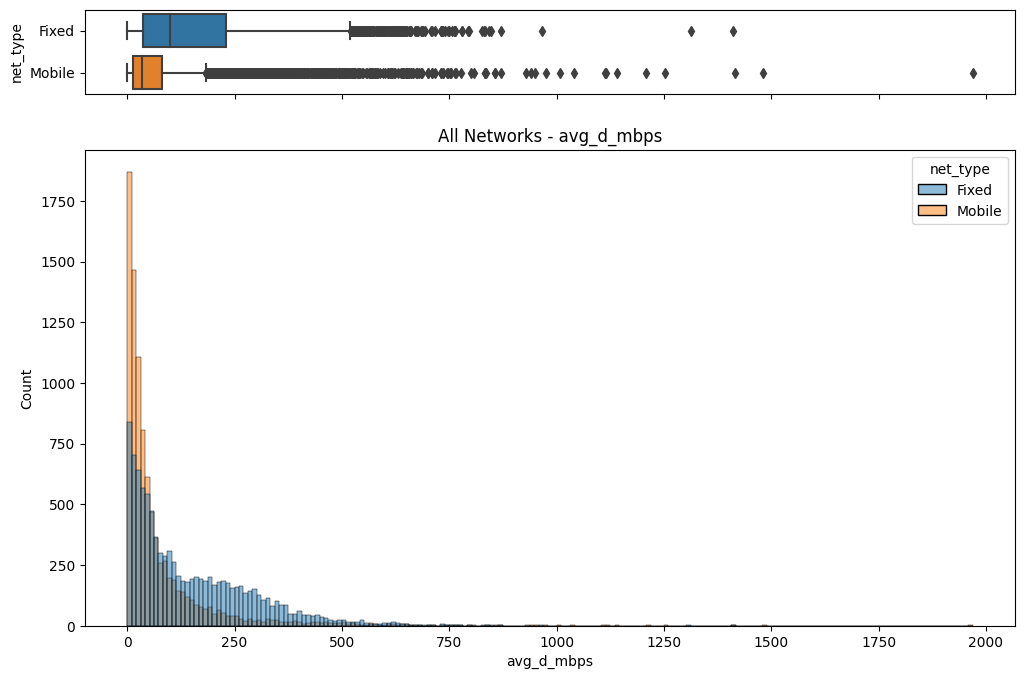

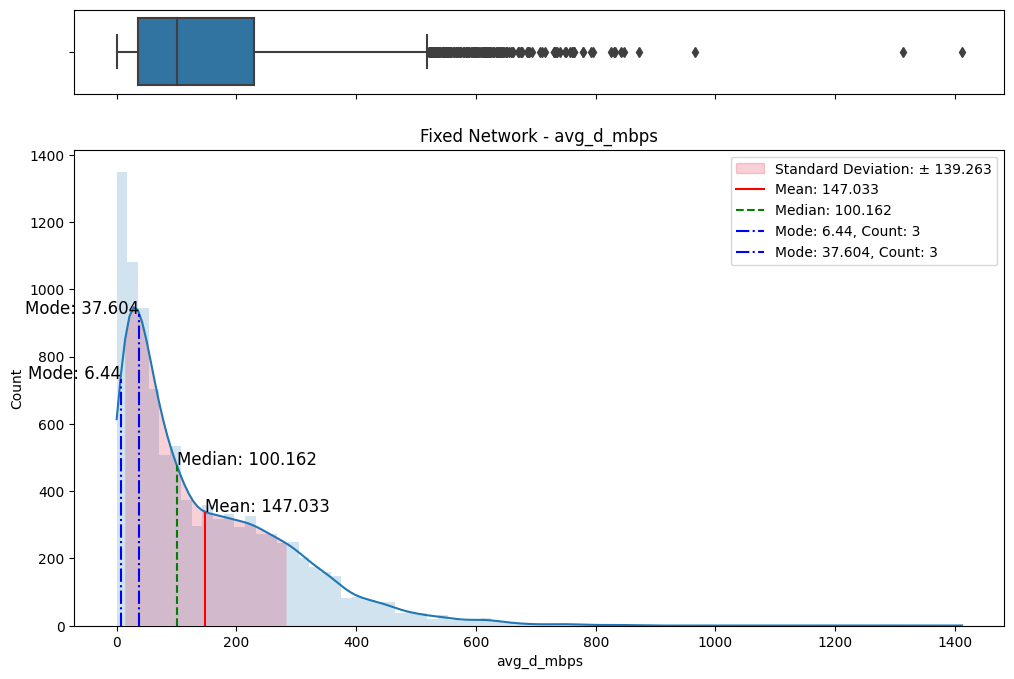

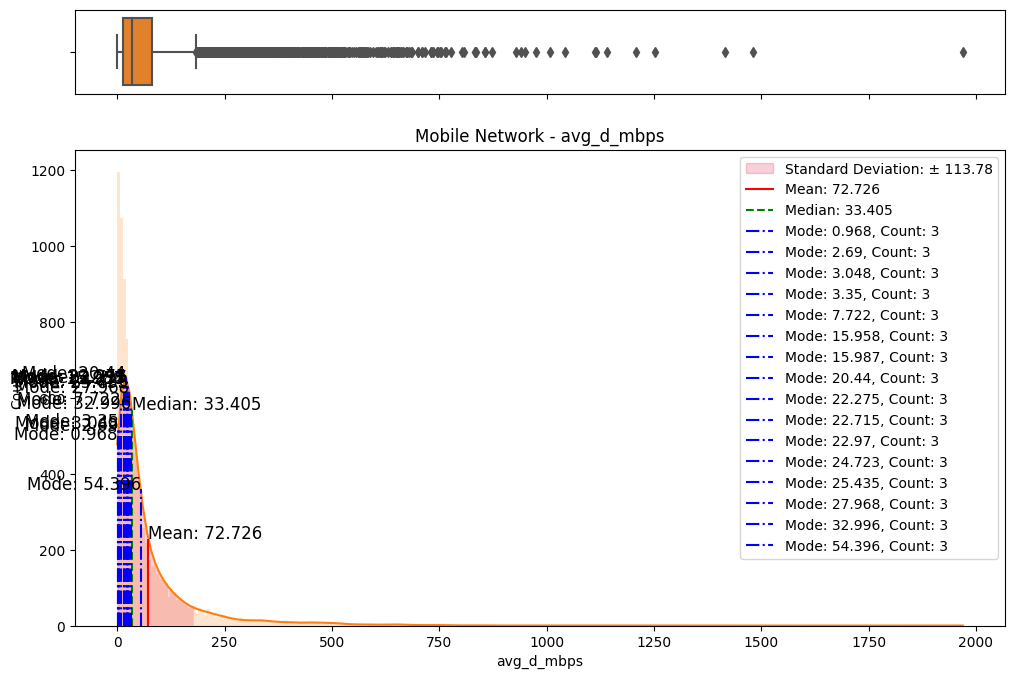

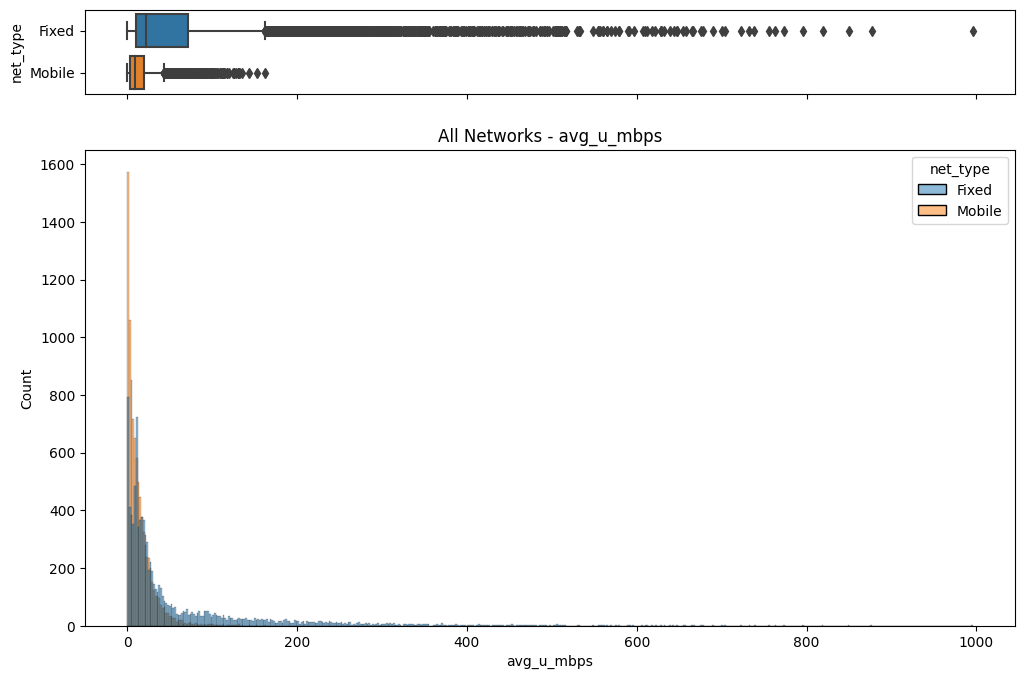

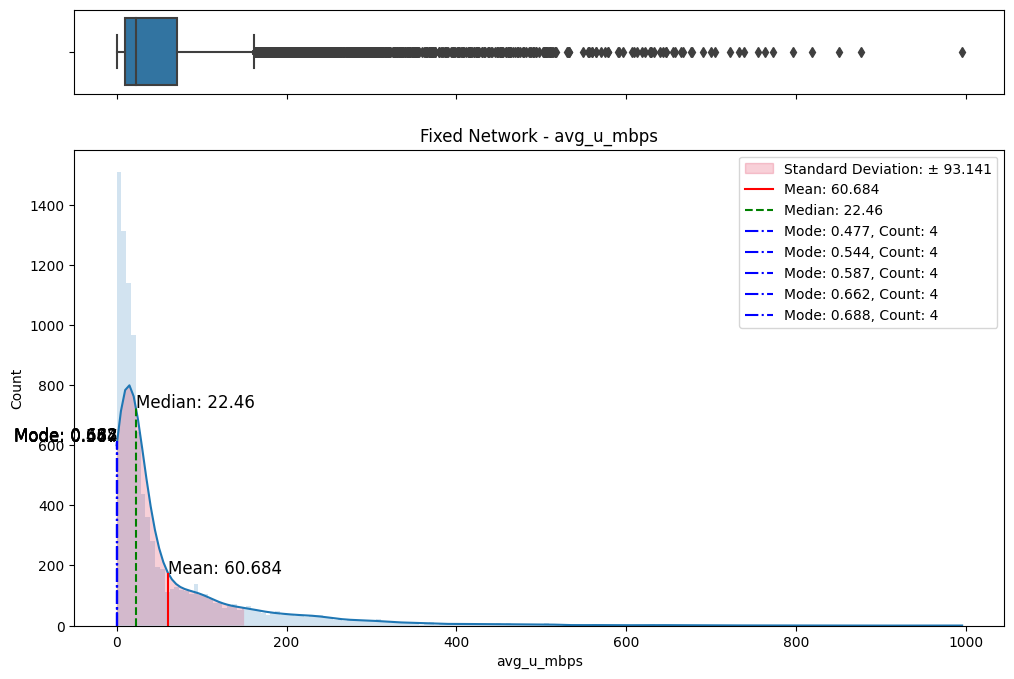

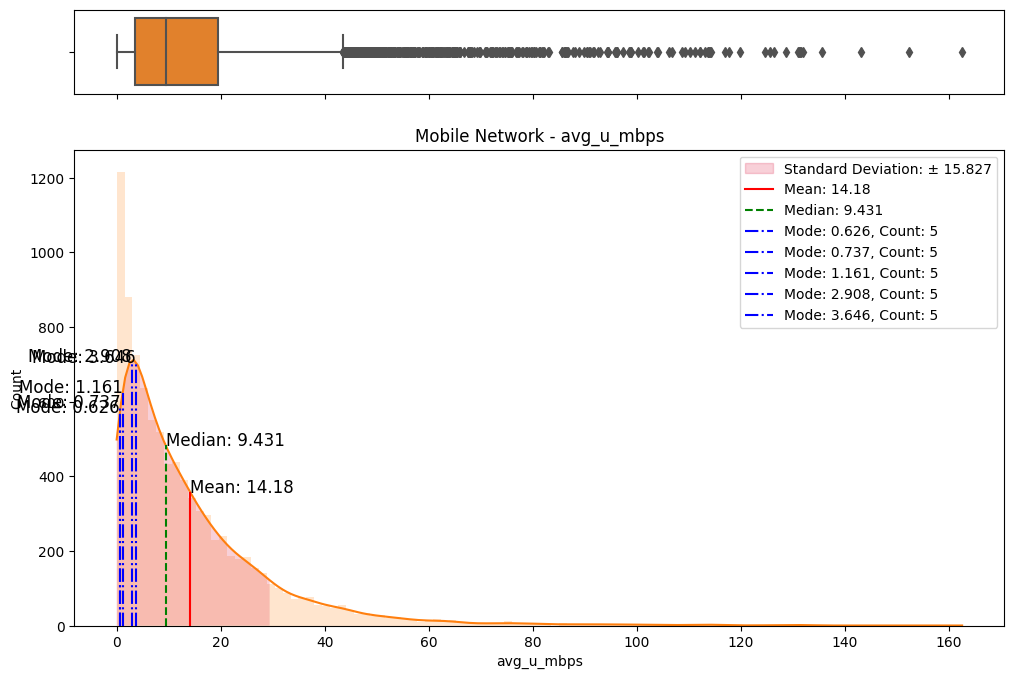

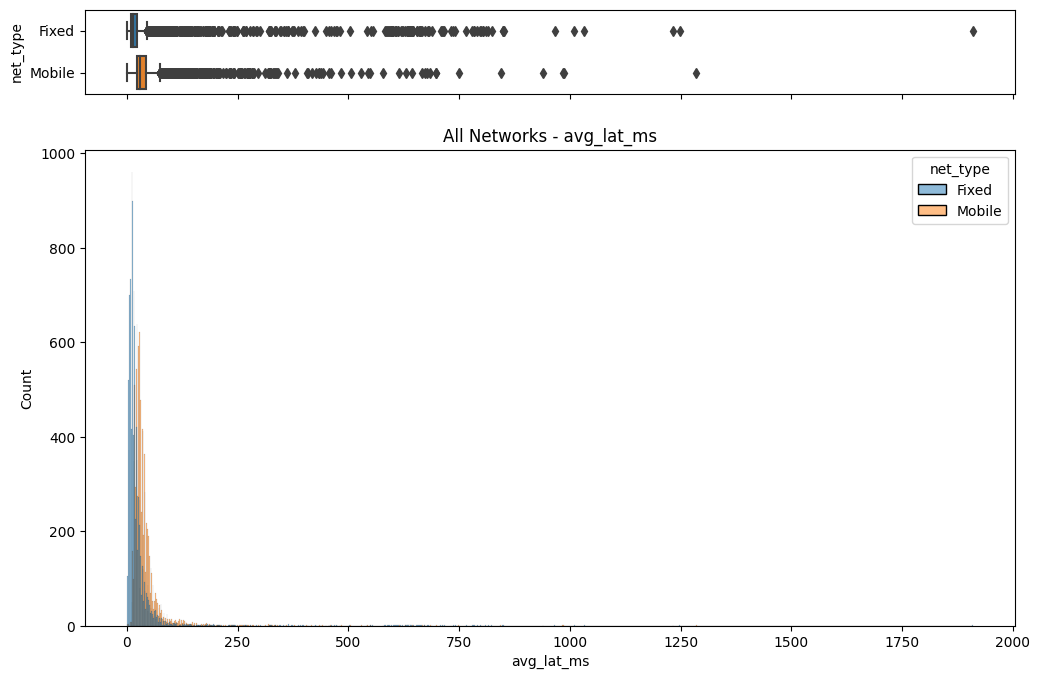

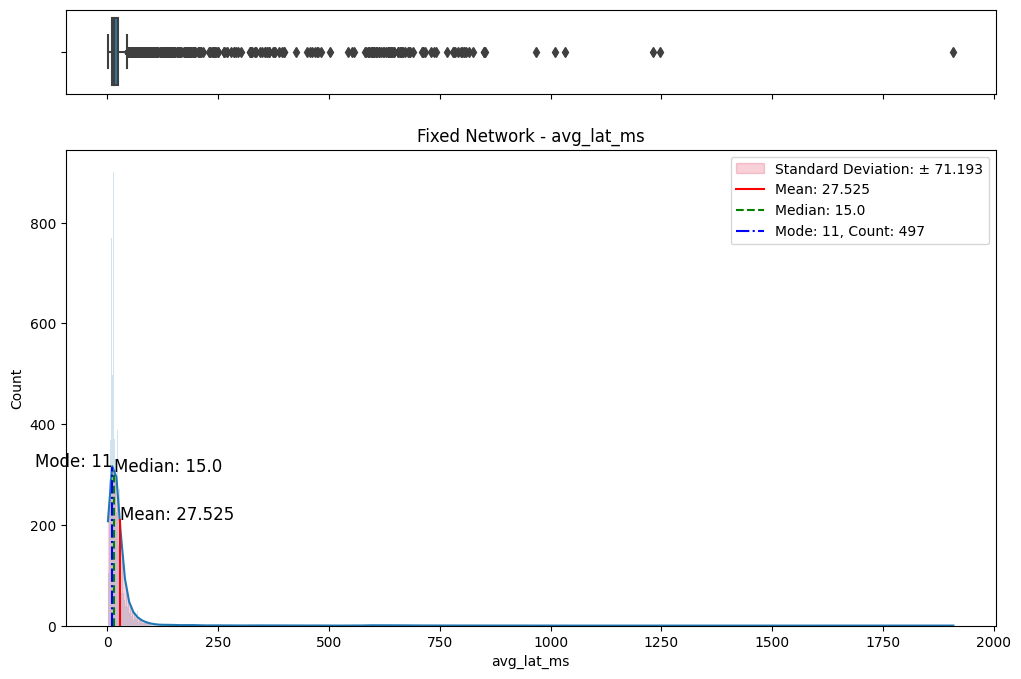

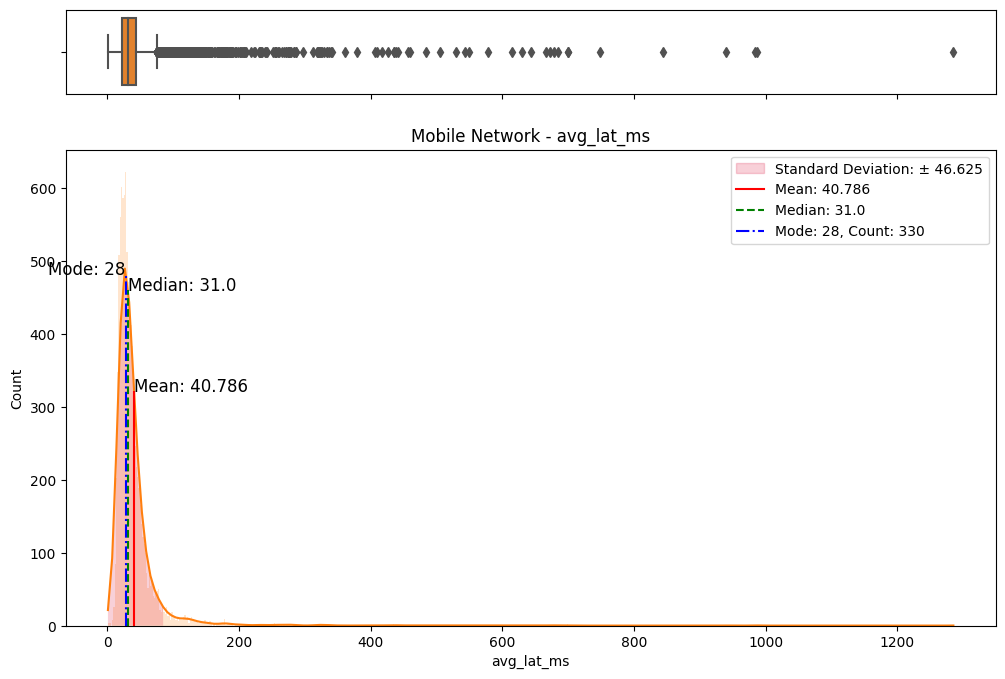

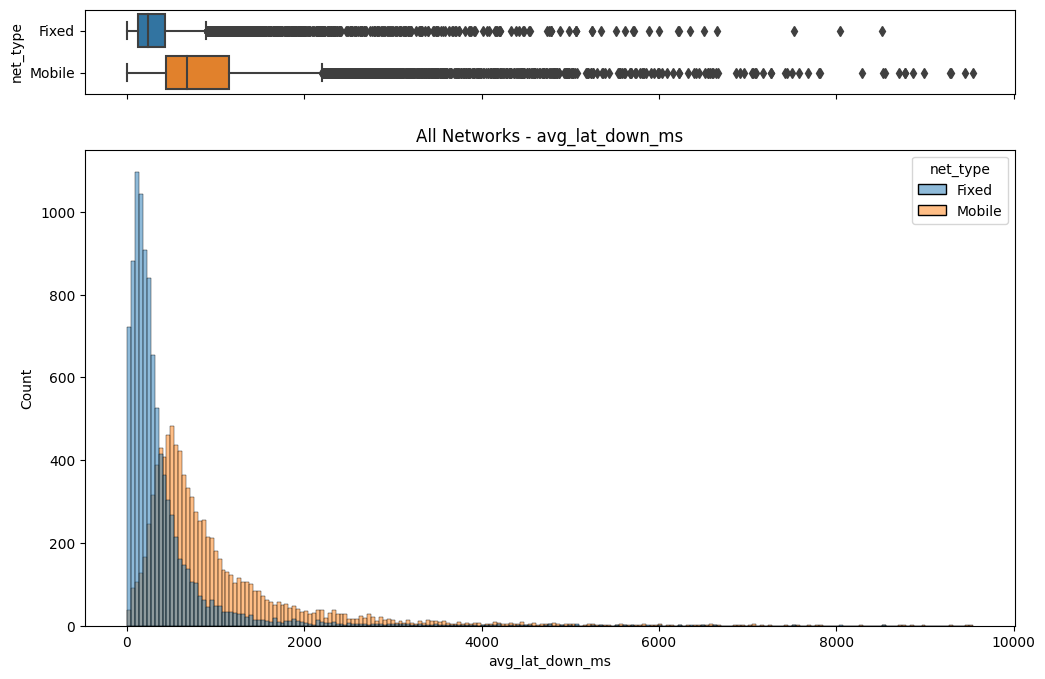

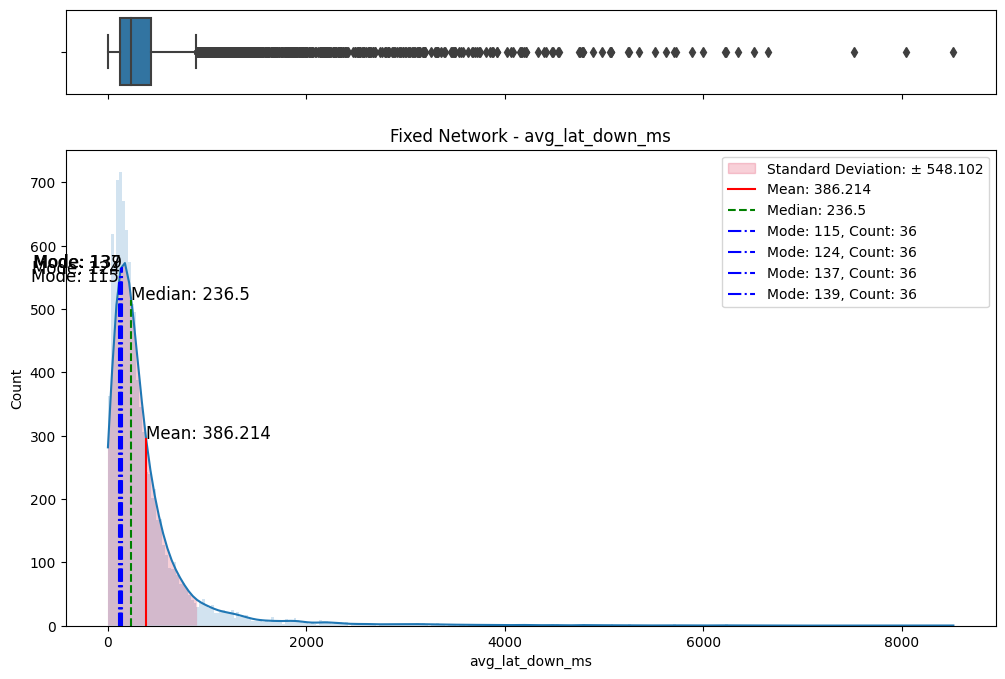

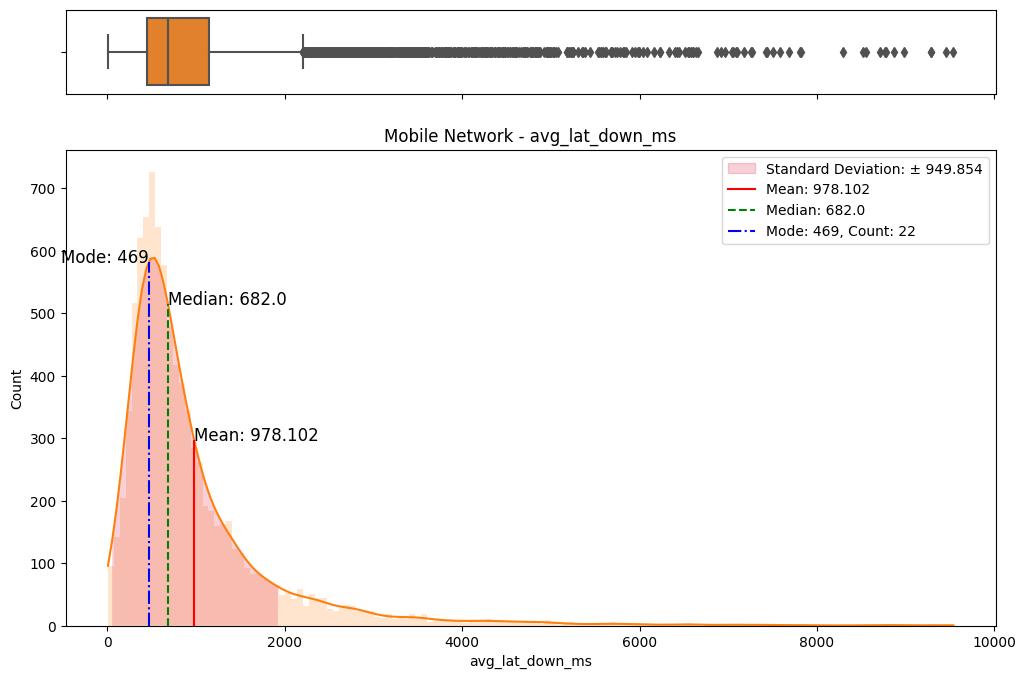

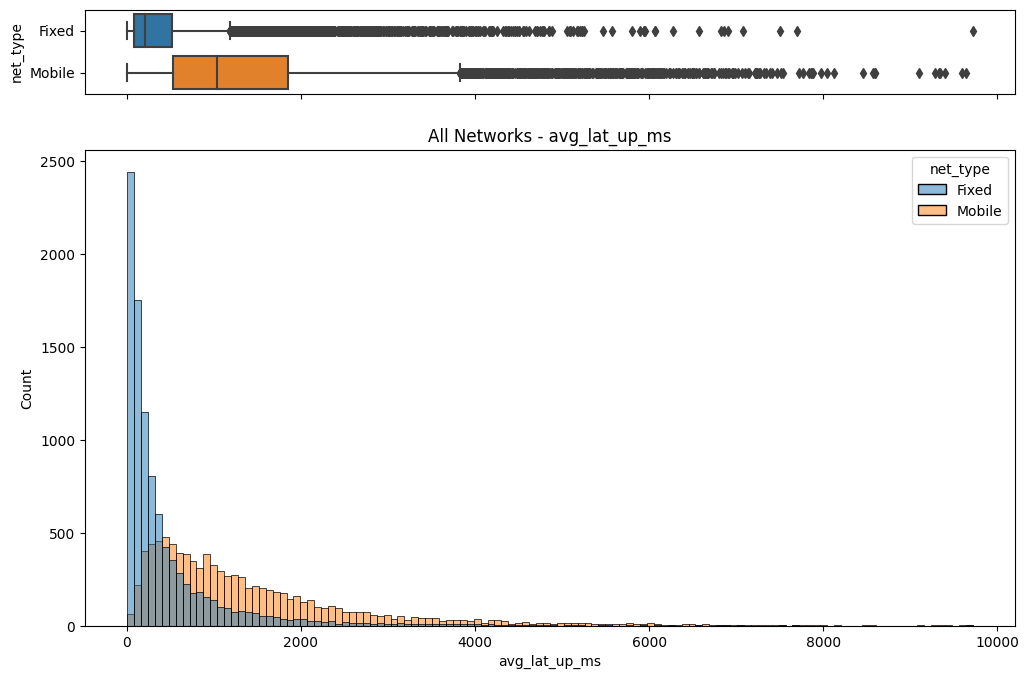

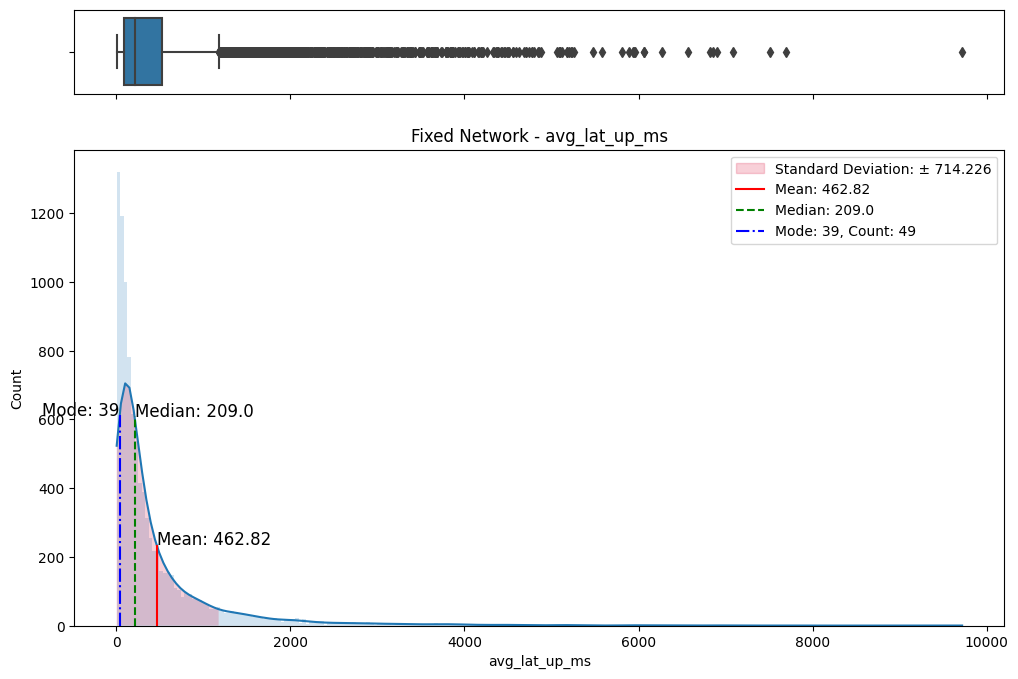

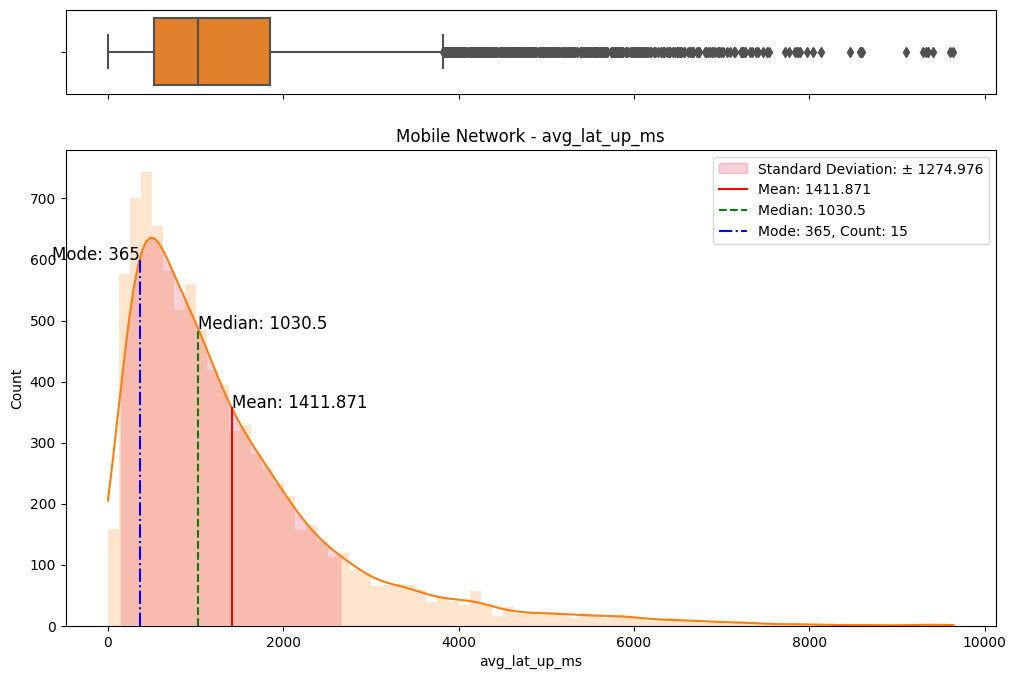

In [34]:
#| label: lst-distplots
#| code-fold: true

# Loop over each column in the dataframe, excluding 'net_type'
for col in df.drop(columns='net_type').columns:
    # creating a figure of two matplotlib.Axes 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12, 8), gridspec_kw={"height_ratios": (.15, .85)})
    
    # assigning a graph to each ax
    sns.boxplot(data=df, x=col, y='net_type', orient='h', ax=ax_box)
    sns.histplot(data=df, x=col, hue='net_type', ax=ax_hist)
    
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.title('All Networks - '+col)
    plt.show()

    # Loop over each key in the dictionary of dataframes
    for key in dfs.keys():
        # Calculate mean, median, mode, and standard deviation for each column
        calc_stats = { 
            'mean': dfs[key][0][col].mean(),
            'med': dfs[key][0][col].median(),
            'mode': dfs[key][0][col].mode(),
            'std': dfs[key][0][col].std()
        }
        # Create a new figure for each key
        fig, (ax_box1, ax_hist1) = plt.subplots(2, sharex=True, figsize=(12, 8), gridspec_kw={"height_ratios": (.15, .85)})

        # Create a boxplot and histogram for each key
        sns.boxplot(data=dfs[key][0], x=col, color=dfs[key][1], ax=ax_box1)
        sns.histplot(data=dfs[key][0], edgecolor=None, x=col, kde=True, color=dfs[key][1], alpha=0.2, ax=ax_hist1)

        # Get the x and y data from the histogram
        kdeline = ax_hist1.lines[0]
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()

        # Add vertical lines and labels for mean, median, and mode
        ax_hist1.vlines(calc_stats['mean'], 0, np.interp(calc_stats['mean'], xs, ys), color='r', linestyle='-')
        ax_hist1.text(calc_stats['mean'], np.interp(calc_stats['mean'], xs, ys), 'Mean: '+str(calc_stats['mean'].round(3)), ha='left', fontsize=12)
        ax_hist1.vlines(calc_stats['med'], 0, np.interp(calc_stats['med'], xs, ys), color='g', linestyle='--')
        ax_hist1.text(calc_stats['med'], np.interp(calc_stats['med'], xs, ys), 'Median: '+str(calc_stats['med'].round(3)), ha='left', fontsize=12)
        ax_hist1.vlines(calc_stats['mode'], 0, np.interp(calc_stats['mode'], xs, ys), color='b', linestyle='-.')

        # Add text for each mode
        for i in range(0,len(calc_stats['mode'])):
            ax_hist1.text(calc_stats['mode'][i], np.interp(calc_stats['mode'][i], xs, ys), 'Mode: '+str(calc_stats['mode'][i].round(3)), ha='right', fontsize=12)
            
        # Calculate the left and right boundaries for standard deviation
        sdev = calc_stats['std']
        left = calc_stats['mean'] - sdev
        right = calc_stats['mean'] + sdev

        # Calculate the y-values for the left and right boundaries
        left_y = np.interp(left, xs, ys)
        right_y = np.interp(right, xs, ys)

        # Create a mask for the x-values within the left and right boundaries
        mask = (left <= xs) & (xs <= right)

        # Interpolate the y-values for the masked x-values
        ys_masked = np.interp(xs[mask], xs, ys)

        # Fill between the masked x-values and interpolated y-values
        ax_hist1.fill_between(xs[mask], 0, ys_masked, facecolor='crimson', alpha=0.2)

        # Create patches for the legend
        red_patch = mpatches.Patch(color='crimson', alpha=0.2, label='Standard Deviation: ± '+str(sdev.round(3)))
        mean_line = mlines.Line2D([], [], color='r', linestyle='-', label='Mean: '+str(calc_stats['mean'].round(3)))
        median_line = mlines.Line2D([], [], color='g', linestyle='--', label='Median: '+str(calc_stats['med'].round(3)))

        # Create lines for each mode
        mode_counts = dfs[key][0][col].value_counts().loc[calc_stats['mode']].values
        mode_lines = []
        for i in range(0,len(calc_stats['mode'])):
            mode_lines.append(
                mlines.Line2D([], [], color='b', linestyle='-.', label='Mode: '+str(calc_stats['mode'][i].round(3))+', Count: '+str(mode_counts[i]))
            )
            
        # Add patches to the legend
        ax_hist1.legend(handles=[red_patch, mean_line, median_line]+mode_lines)

        # Remove x axis name for the boxplots
        ax_box1.set(xlabel='')
        plt.title(key+' Network - '+col)
        plt.show()

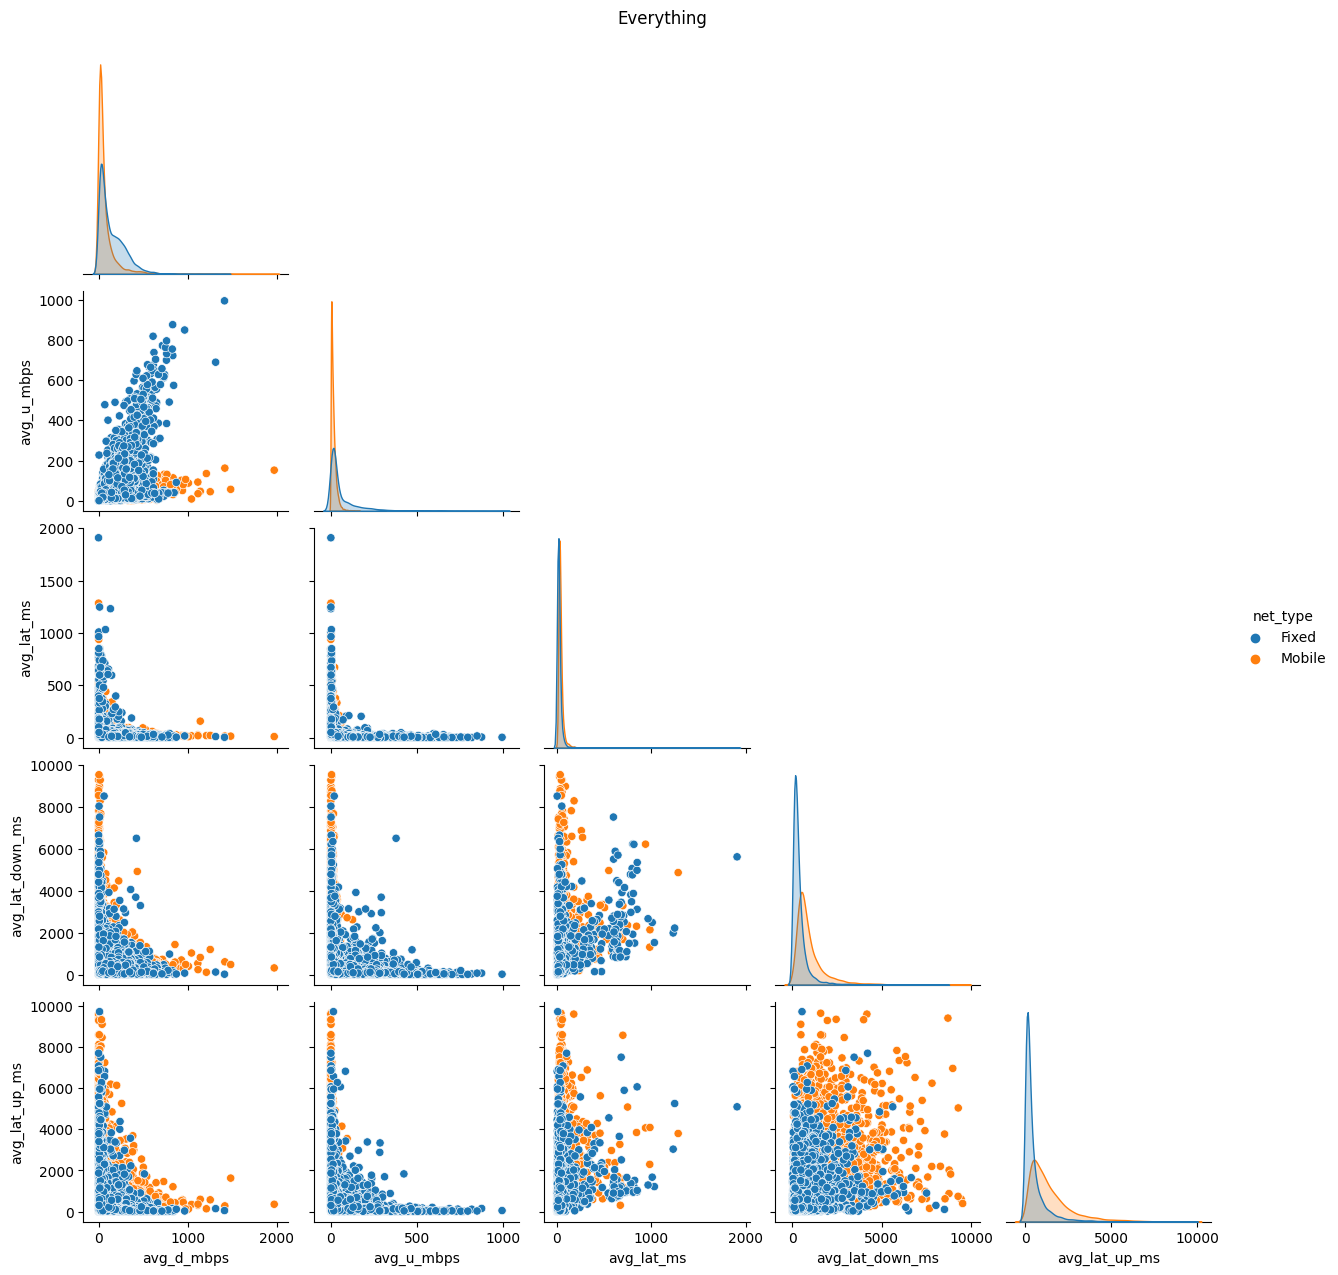

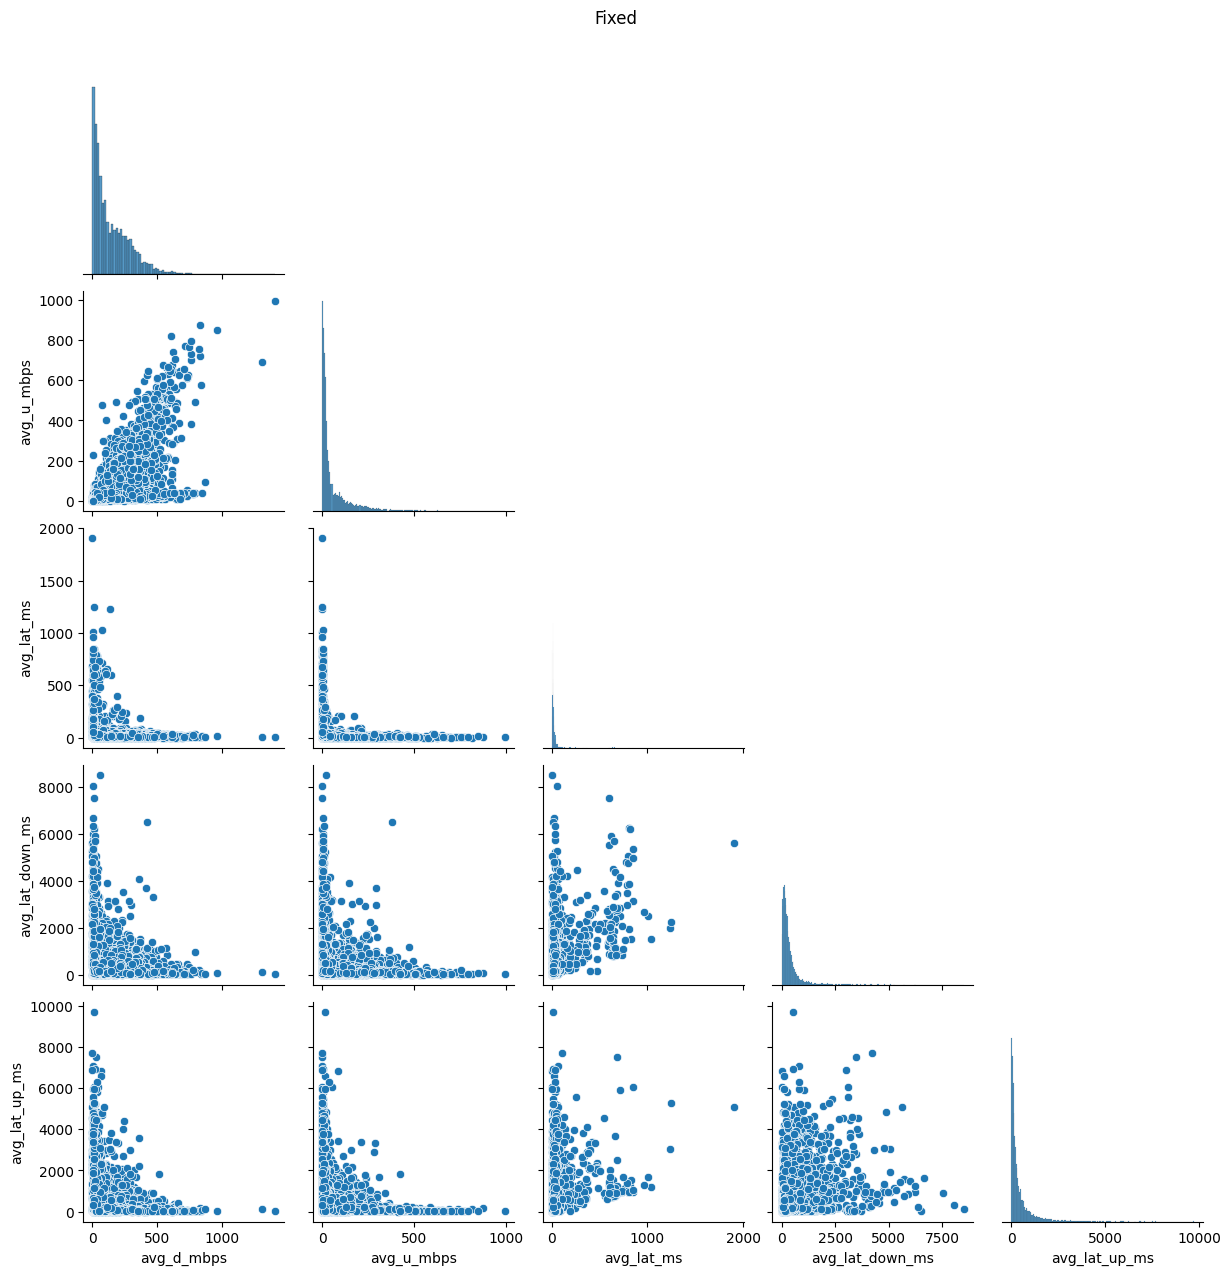

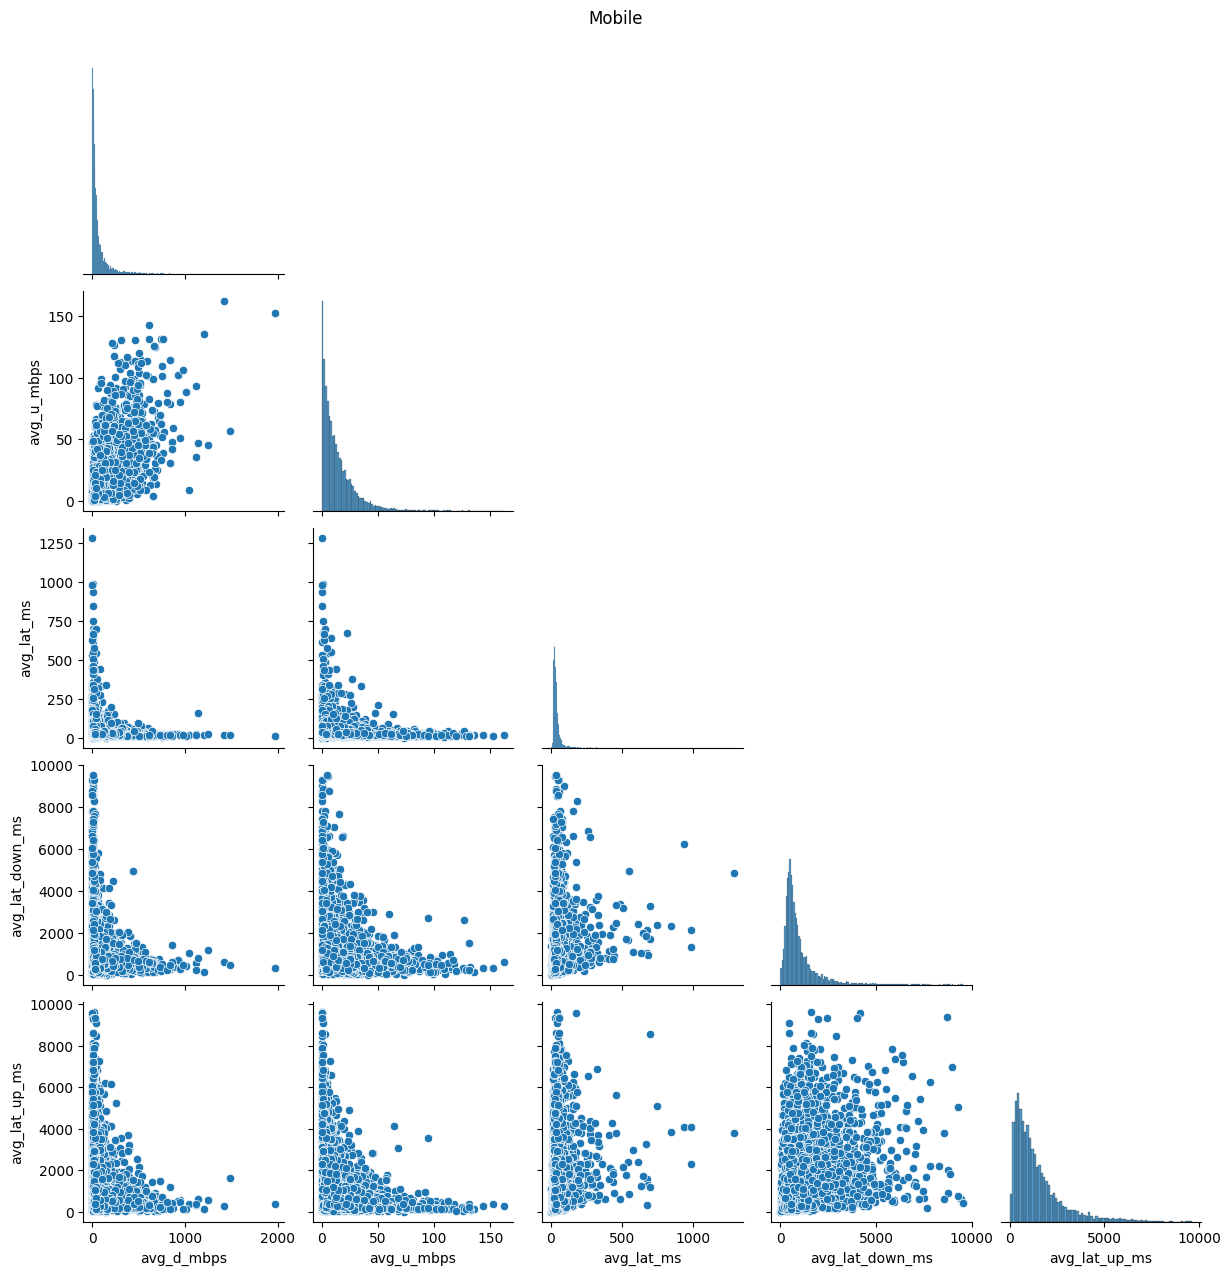

In [35]:
#| label: fig-orgpairs
#| fig-cap: "Pairplots on untransformed data"
#| fig-subcap:
#|  - "Both networks"
#|  - "Fixed network"
#|  - "Mobile network"
#| layout: [[1], [1,1]]
#| code-fold: true

# Create a pairplot of the dataframe 'df' sorted by 'net_type'
g = sns.pairplot(df, hue='net_type', corner=True)
# Set the title of the plot and adjust its position
g.fig.suptitle('Everything', y=1.02)
# Display the plot
plt.show()

# Loop over each key in the dictionary of dataframes 'dfs'
for key in dfs:
    # Create a pairplot each dataframe in the dictionary
    g = sns.pairplot(dfs[key][0], corner=True)
    # Set the title of the plot as the key and adjust its position
    g.fig.suptitle(key, y=1.02)
    # Display the plot
    plt.show()

In [270]:
#| label: colskews
#| eval: false
#| code-fold: true

# Loop over each key in the skew_dict dictionary
for col in skew_dict.keys():
    # Create a DataFrame from the skew_dict dictionary
    # The DataFrame will have a multi-level index with the column name and the network type
    df_skews = pd.DataFrame.from_dict({(col,j): skew_dict[col][j] 
                            for j in skew_dict[col].keys()},
                        orient='index')

    # Reset the index of the DataFrame
    df_skews.reset_index(level=1, inplace=True)

    # Rename the columns
    df_skews.columns = ['Network Type', 'Skew', 'Kurtosis']

    # Create a table from the DataFrame and display it
    fig =  ff.create_table(df_skews, index=True)
    fig.show()

/tmp/ipykernel_243718/4080871256.py:32: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



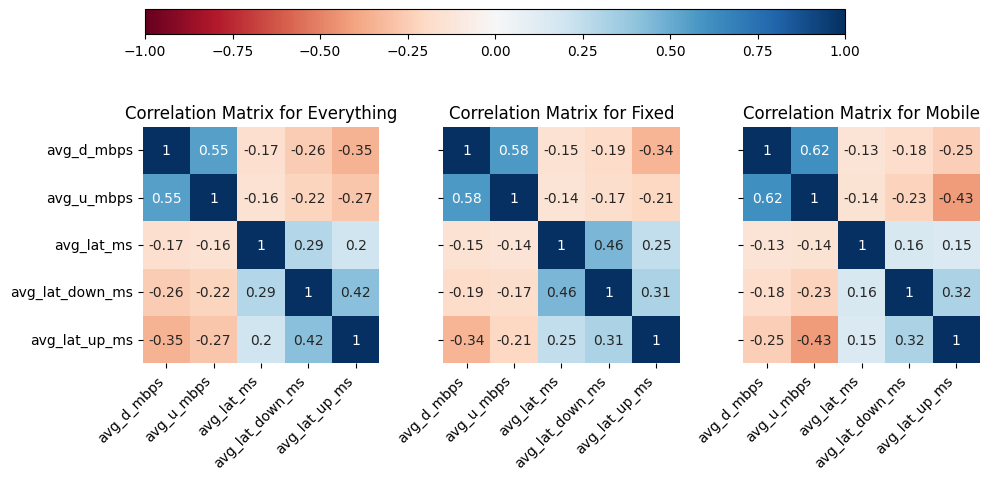

In [37]:
#| label: fig-orgheatmaps
#| fig-cap: "Correlation heatmap matrices for both networks together and separately"
#| code-fold: true

# Create a subplot with 1 row and 3 columns, sharing the y-axis, and set the figure size
fig, axes_mat = plt.subplots(1, 3, sharey=True, figsize=(10, 5))

# Create a correlation matrix of all the numerical columns
corr = df.drop(columns='net_type').corr()

# Visualize the correlation matrix with a heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=axes_mat[0], cbar=False)

# Rotate and align labels on the x-axis
axes_mat[0].set_xticklabels(axes_mat[0].get_xticklabels(), rotation=45, horizontalalignment='right')
axes_mat[0].set_title('Correlation Matrix for Everything')

# Loop over each key in the dictionary 'dfs' and 
# the axes in 'axes_mat' starting from the second one
for key, ax in zip(dfs, axes_mat[1:]):
    # Create a correlation matrix of all the numerical columns
    corr = dfs[key][0].corr()

    # Visualize the correlation matrix with a heatmap
    sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax, cbar=False)

    # Rotate and align labels on the x-axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title('Correlation Matrix for '+key)

# Create a colorbar for the whole figure
norm = Normalize(vmin=-1, vmax=1)
# Create a ScalarMappable object with the 'RdBu' colormap and the normalization
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
# Set the array for the ScalarMappable to an empty array
sm.set_array([])

# Add an axes to the figure for the colorbar at position [left, top, width, height]
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.05])  # [left, top, width, height]
# Add the colorbar to the figure with the ScalarMappable,
# with horizontal orientation, and in the colorbar axes
fig.colorbar(sm, orientation='horizontal', cax=cbar_ax)

# Adjust the padding between and around the subplots
plt.tight_layout()
# Display the figure
plt.show()

# Data Transformations

In [38]:
# Define a list of transformations
trans_list = ['Org Skew', 'Sqrt Skew', 'Log Skew', 'Box-Cox Skew', 'Yeo-J Skew']

# Get a list of keys from the 'dfs' dictionary
dfs_keys = list(dfs.keys())

# Create a nested dictionary 'trans_skews' with the outermost keys being column names from 'df' (excluding 'net_type'),
# the second level keys being keys from 'dfs', and the innermost keys being transformations from 'trans_list'.
# The values are the skewness of the original data if the transformation is 'Org Skew', otherwise an empty string.
trans_skews = {
    col: {
        key: {
            trans: skew_dict[col][key]['Skew'] if trans == 'Org Skew' else '' 
            for trans in trans_list
        } 
        for key in dfs_keys
    } 
    for col in df.drop(columns='net_type').columns
}

# Print the 'trans_skews' dictionary
print(trans_skews)

{'avg_d_mbps': {'Fixed': {'Org Skew': 1.37781, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}, 'Mobile': {'Org Skew': 4.10912, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}}, 'avg_u_mbps': {'Fixed': {'Org Skew': 3.07749, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}, 'Mobile': {'Org Skew': 2.64466, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}}, 'avg_lat_ms': {'Fixed': {'Org Skew': 10.00117, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}, 'Mobile': {'Org Skew': 10.49187, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}}, 'avg_lat_down_ms': {'Fixed': {'Org Skew': 5.22333, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}, 'Mobile': {'Org Skew': 3.21657, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': '', 'Yeo-J Skew': ''}}, 'avg_lat_up_ms': {'Fixed': {'Org Skew': 3.75387, 'Sqrt Skew': '', 'Log Skew': '', 'Box-Cox Skew': ''

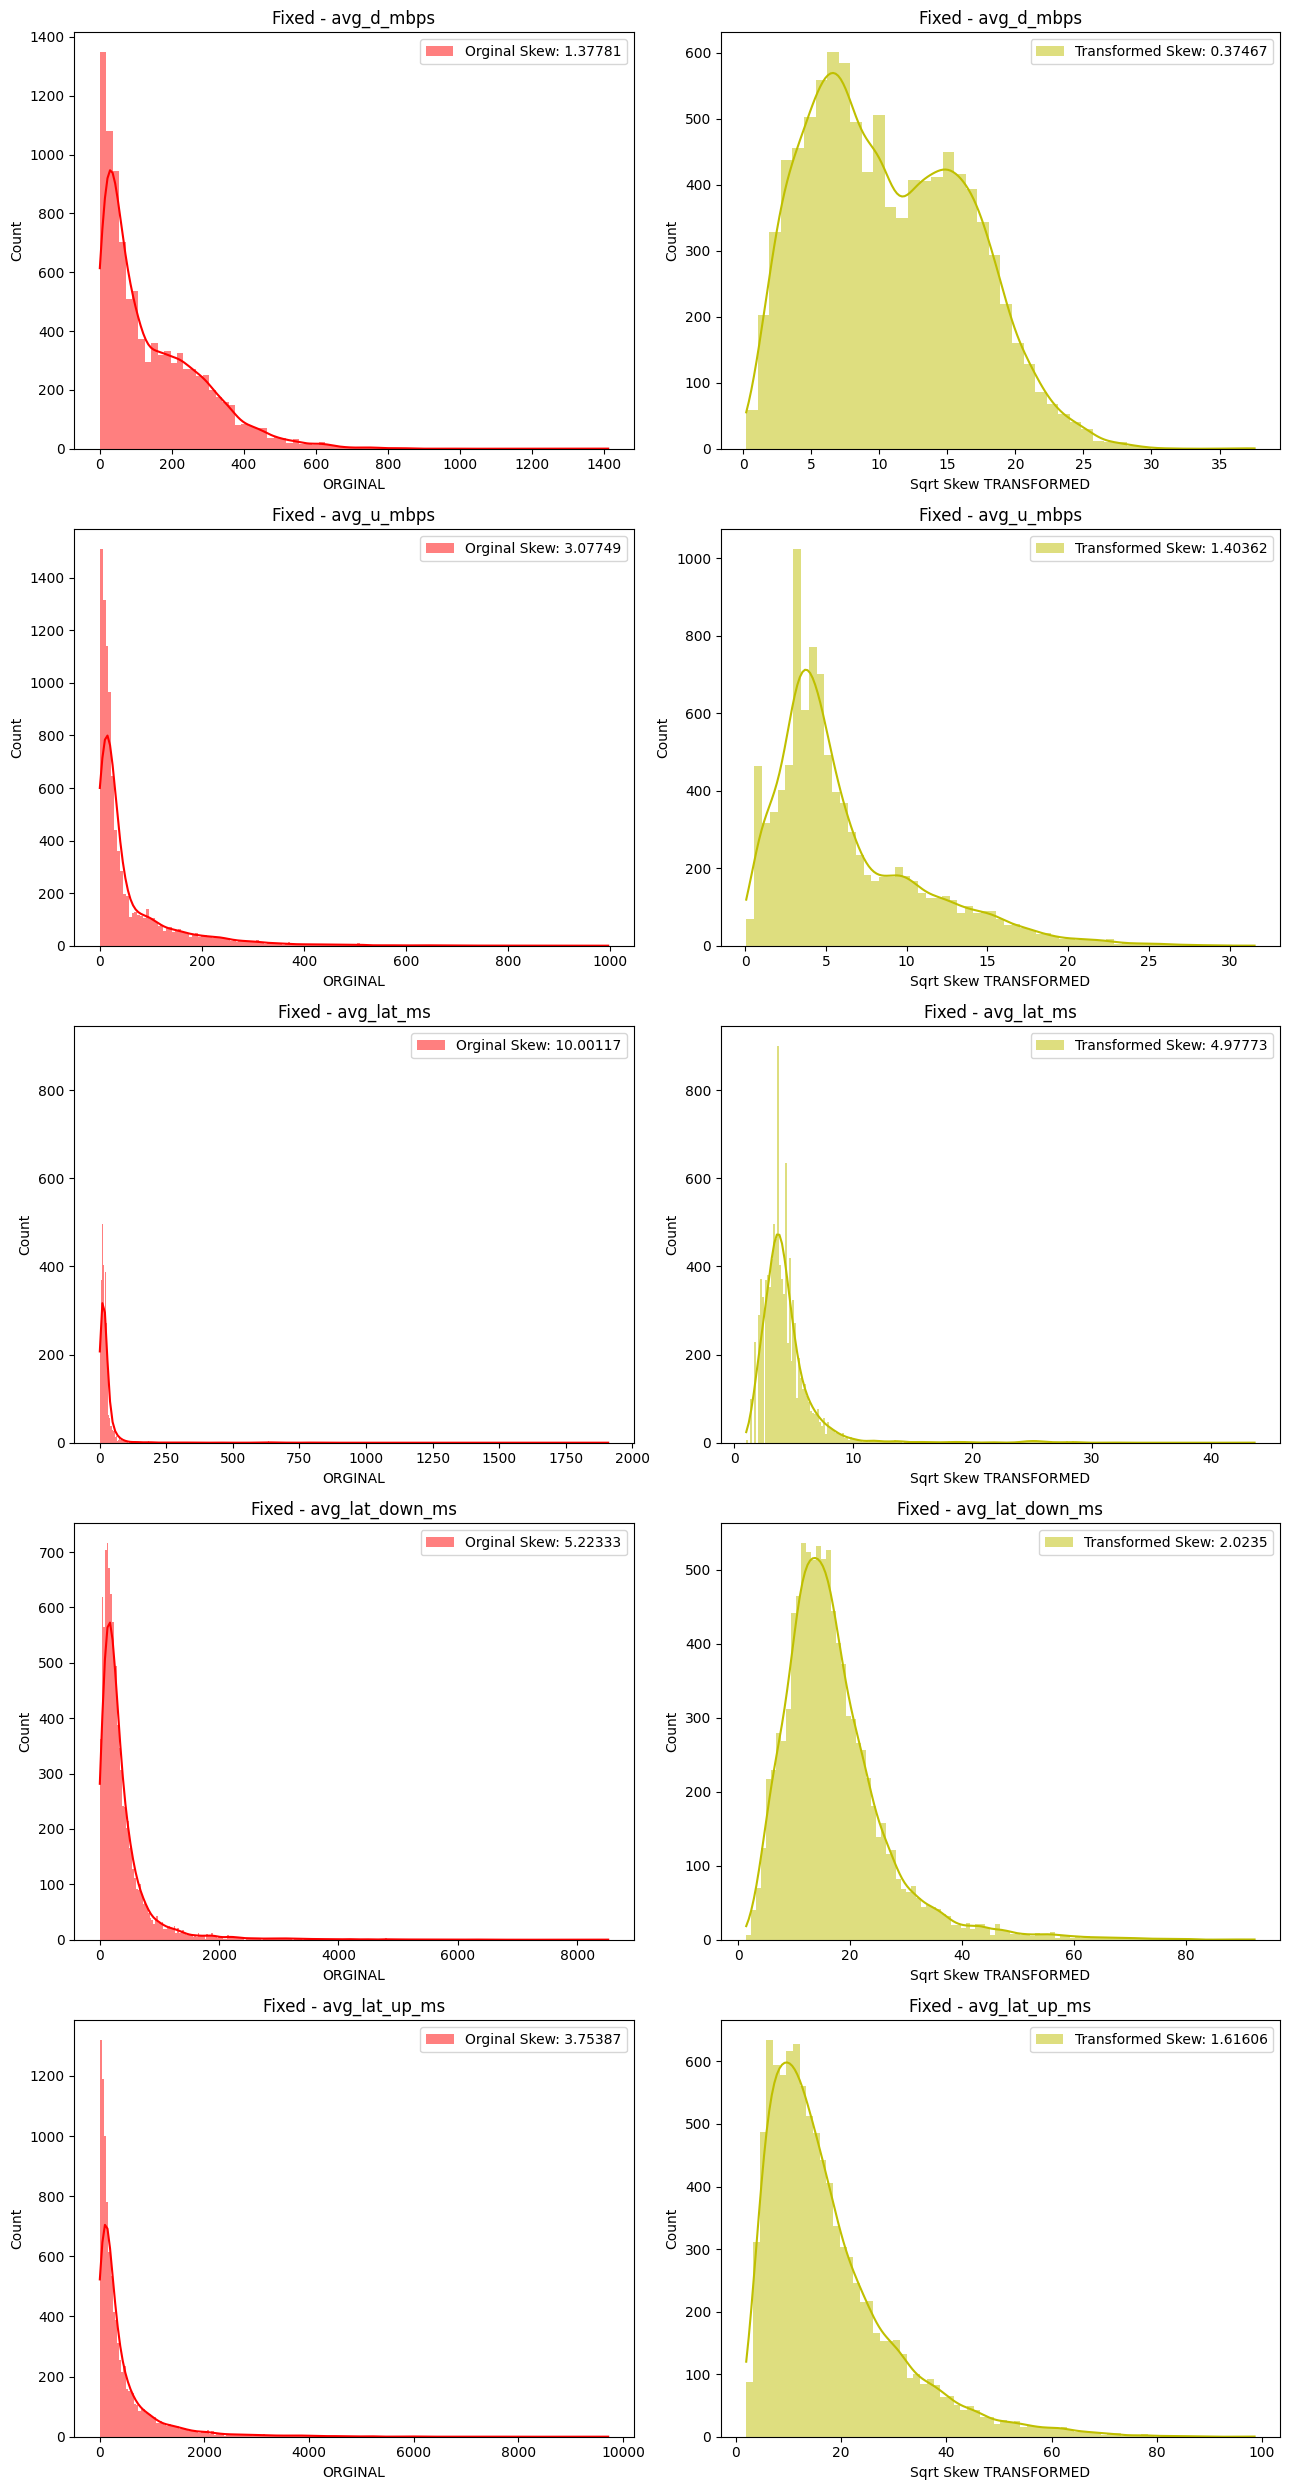

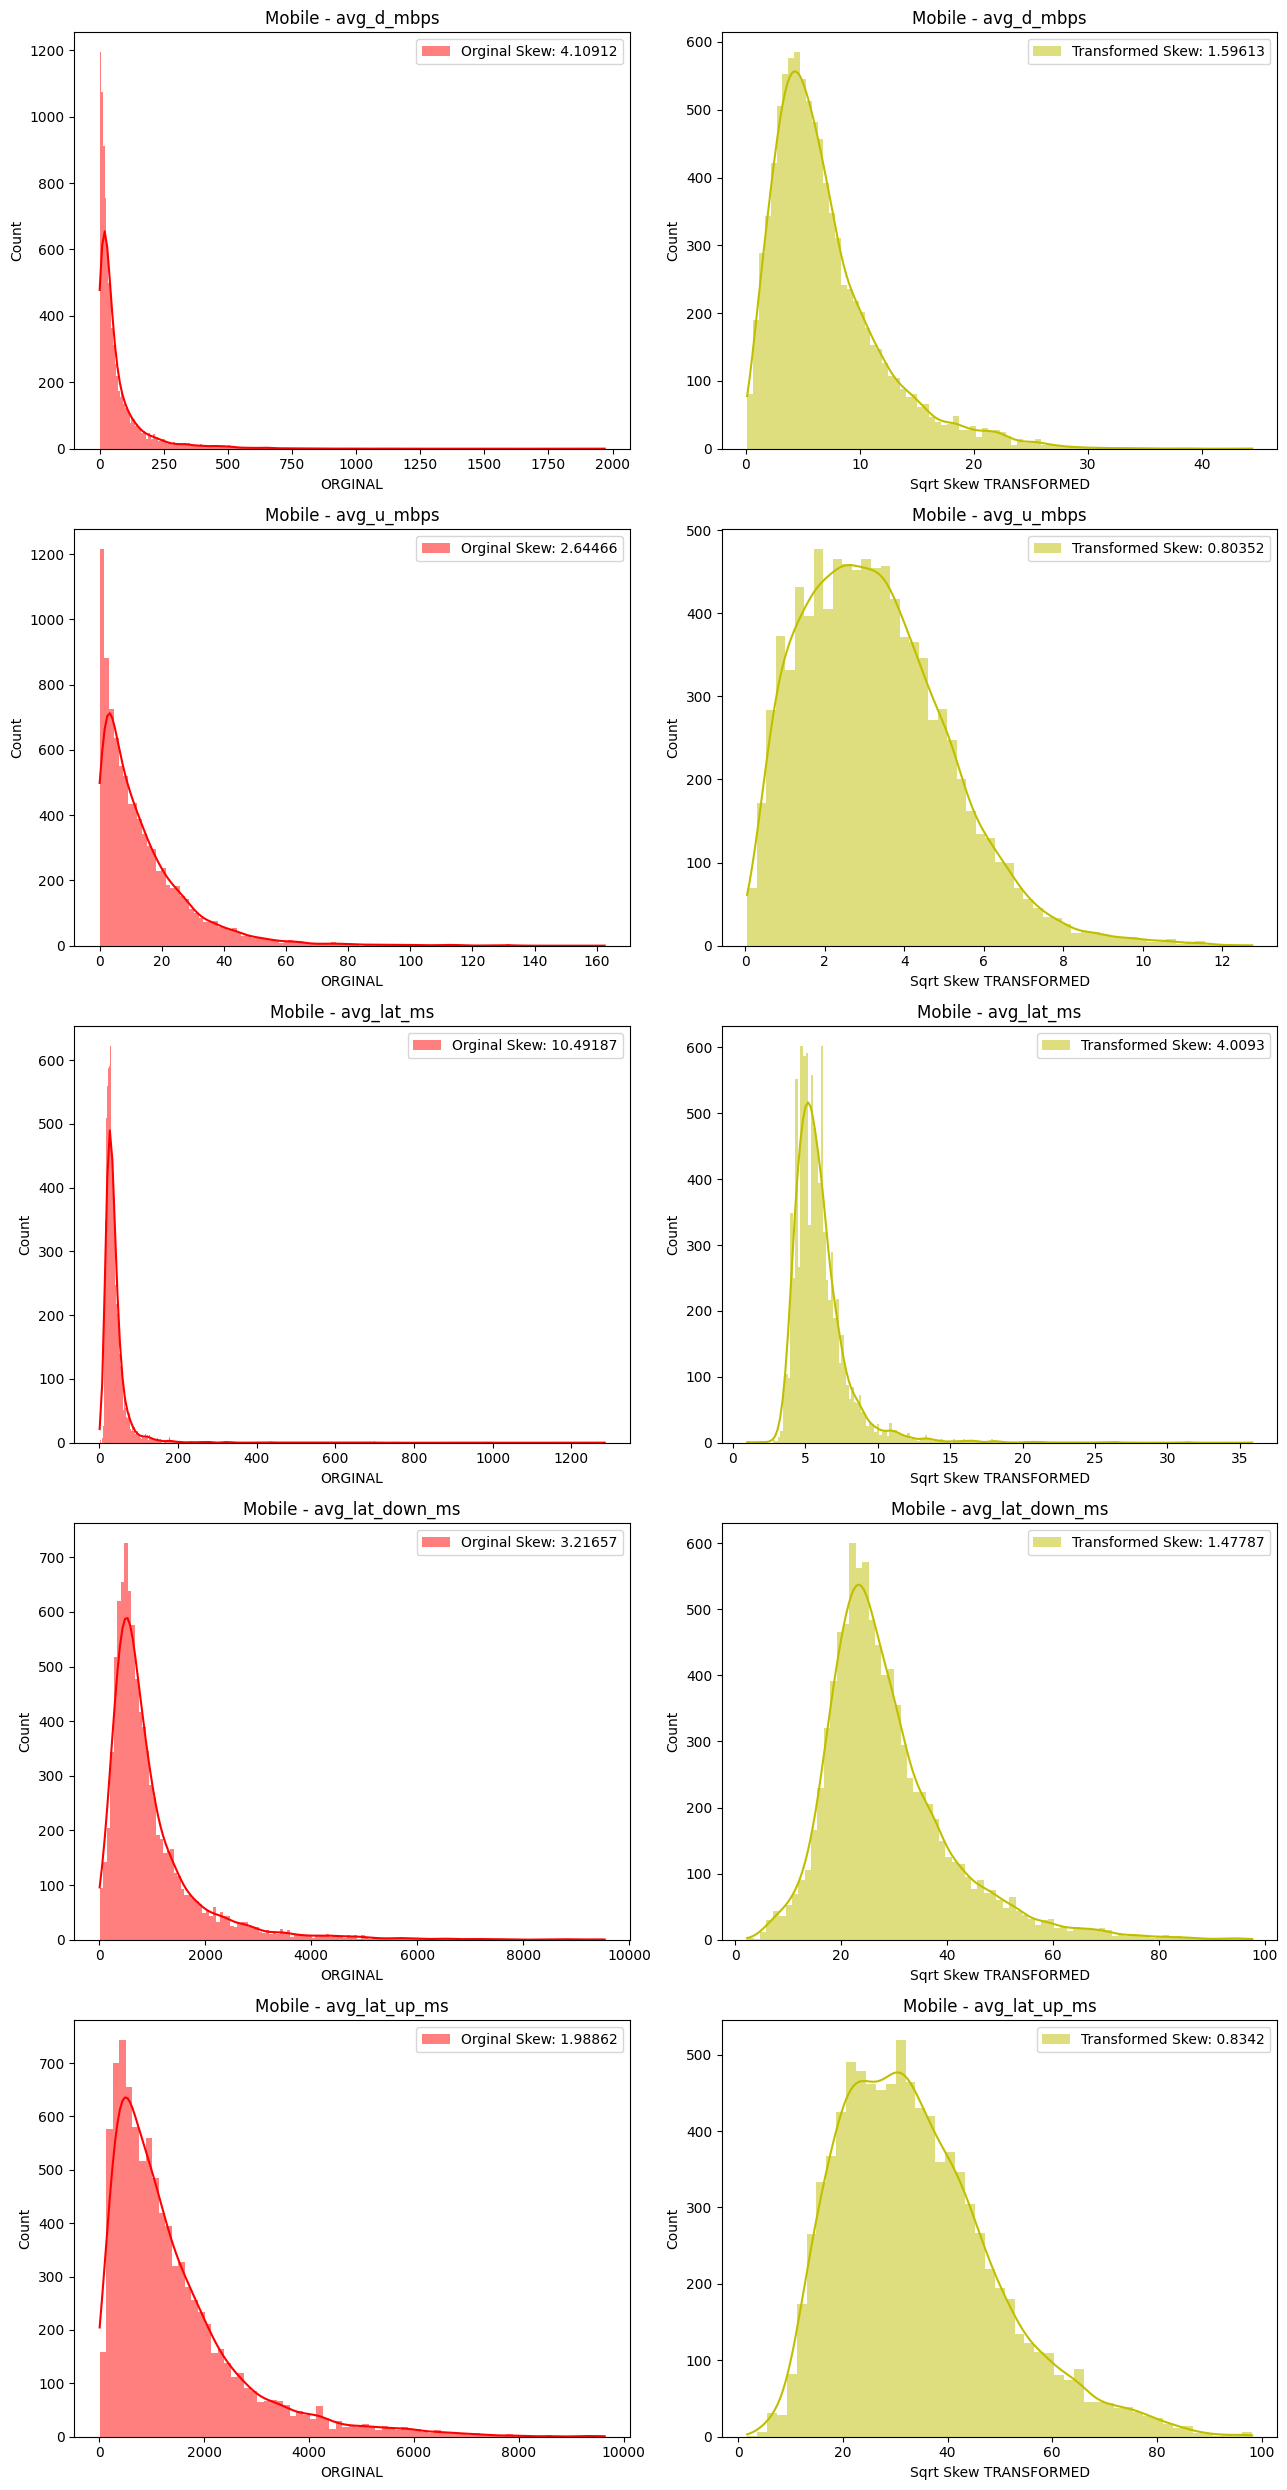

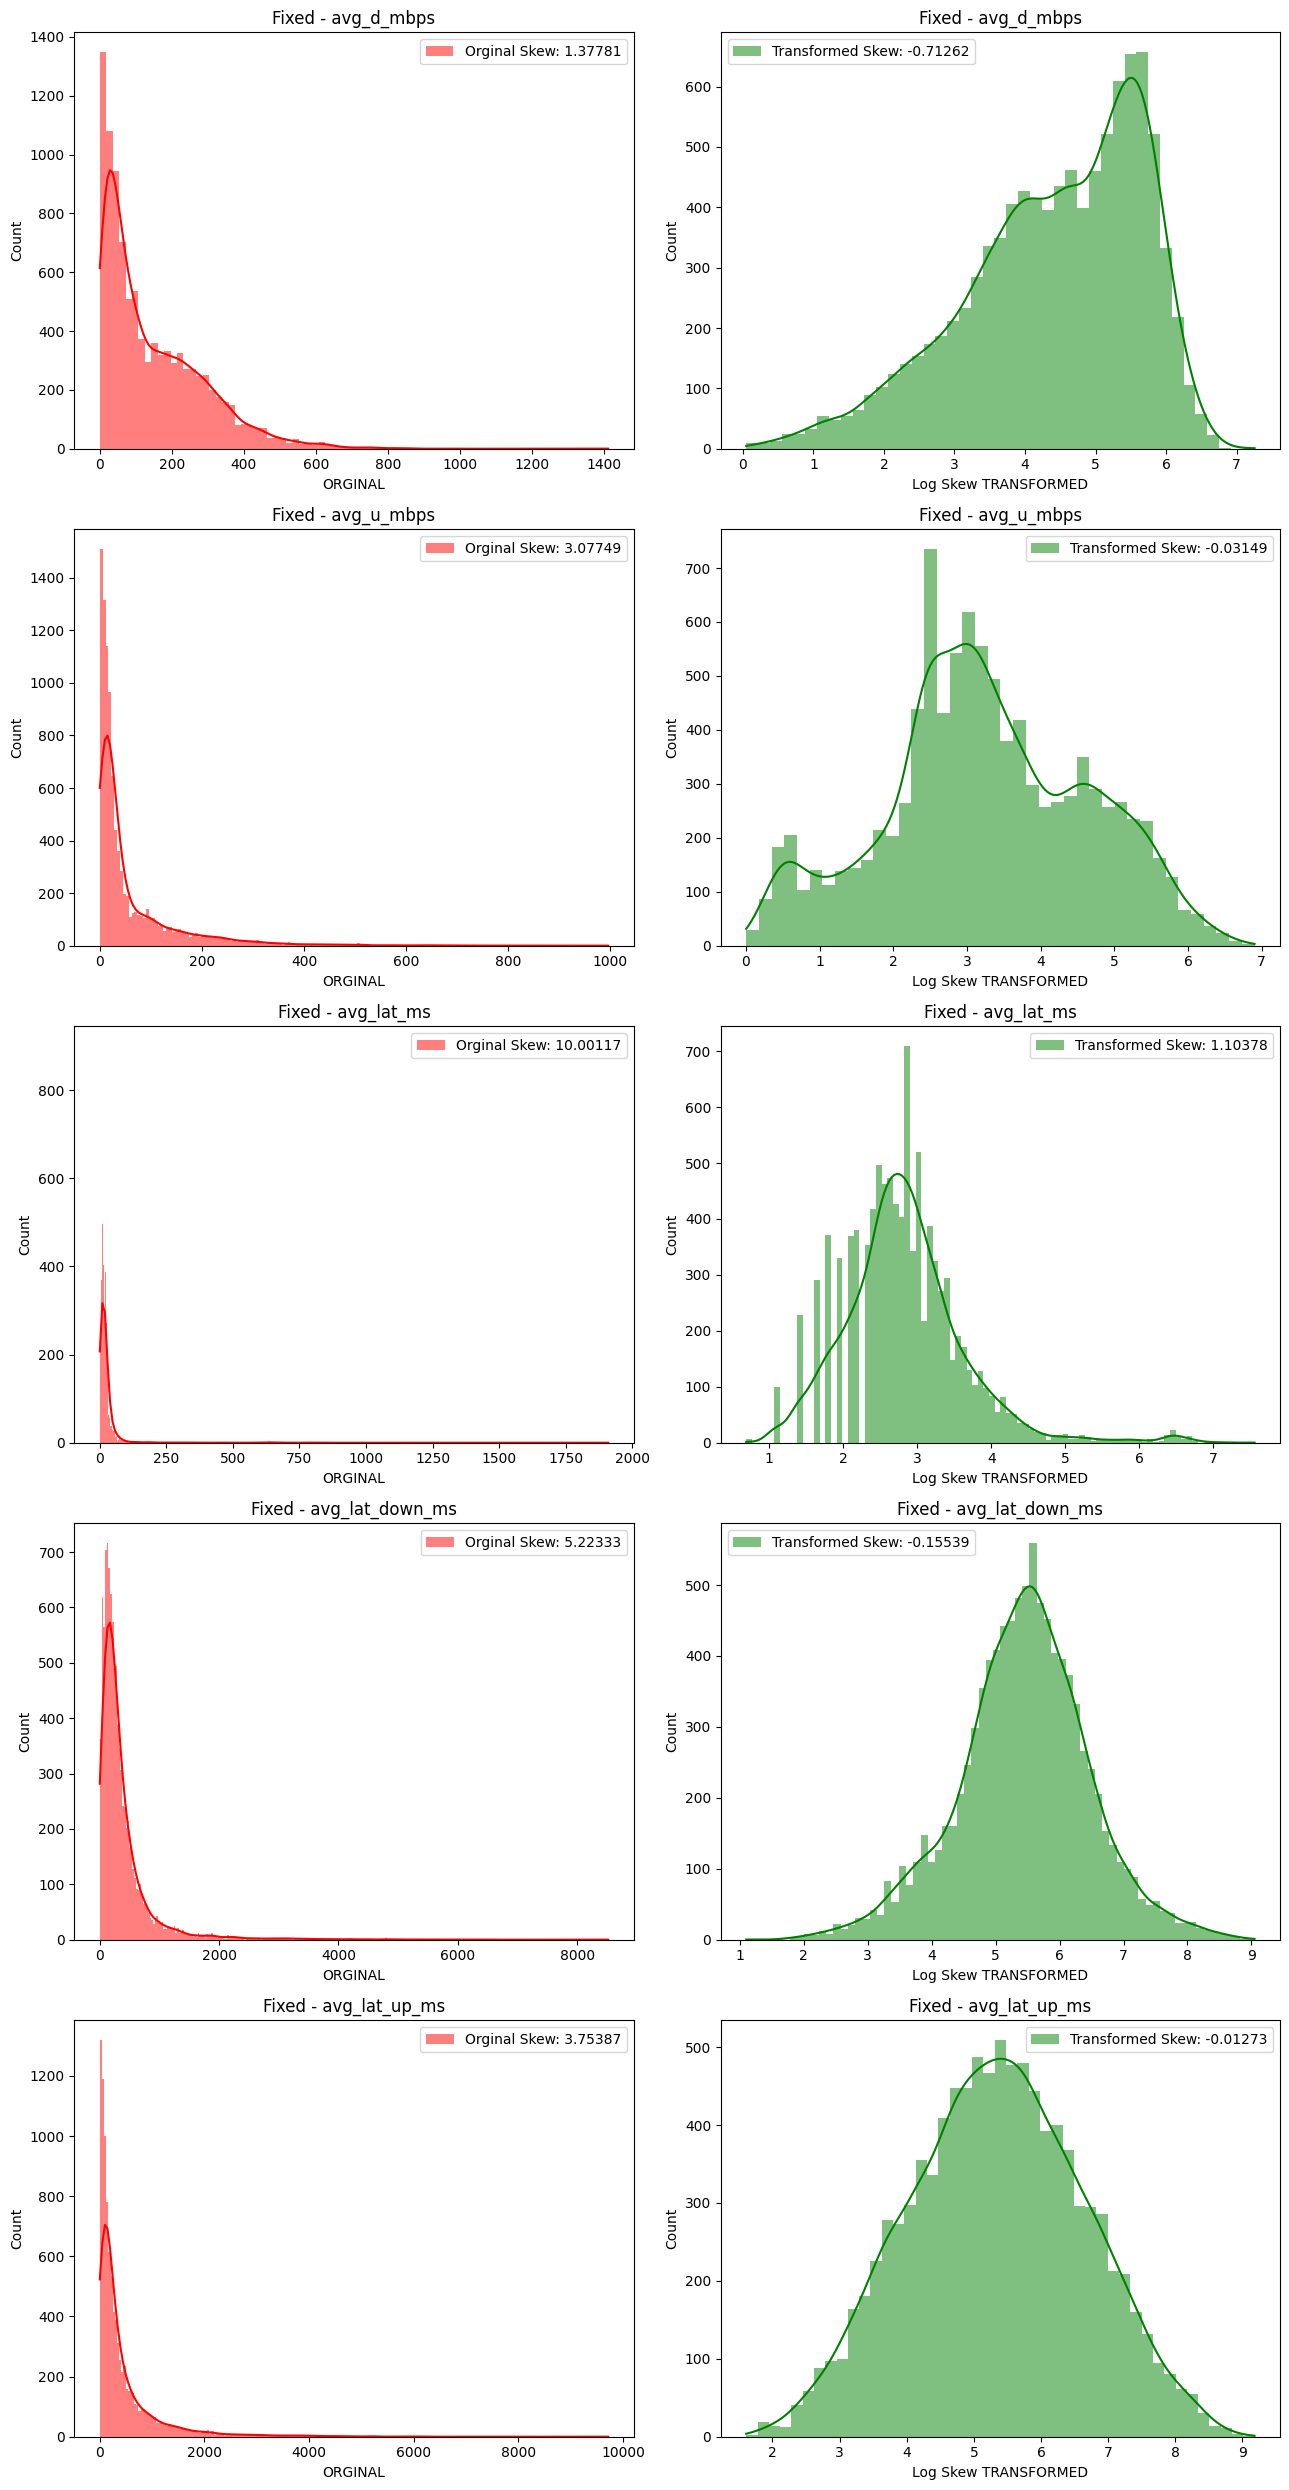

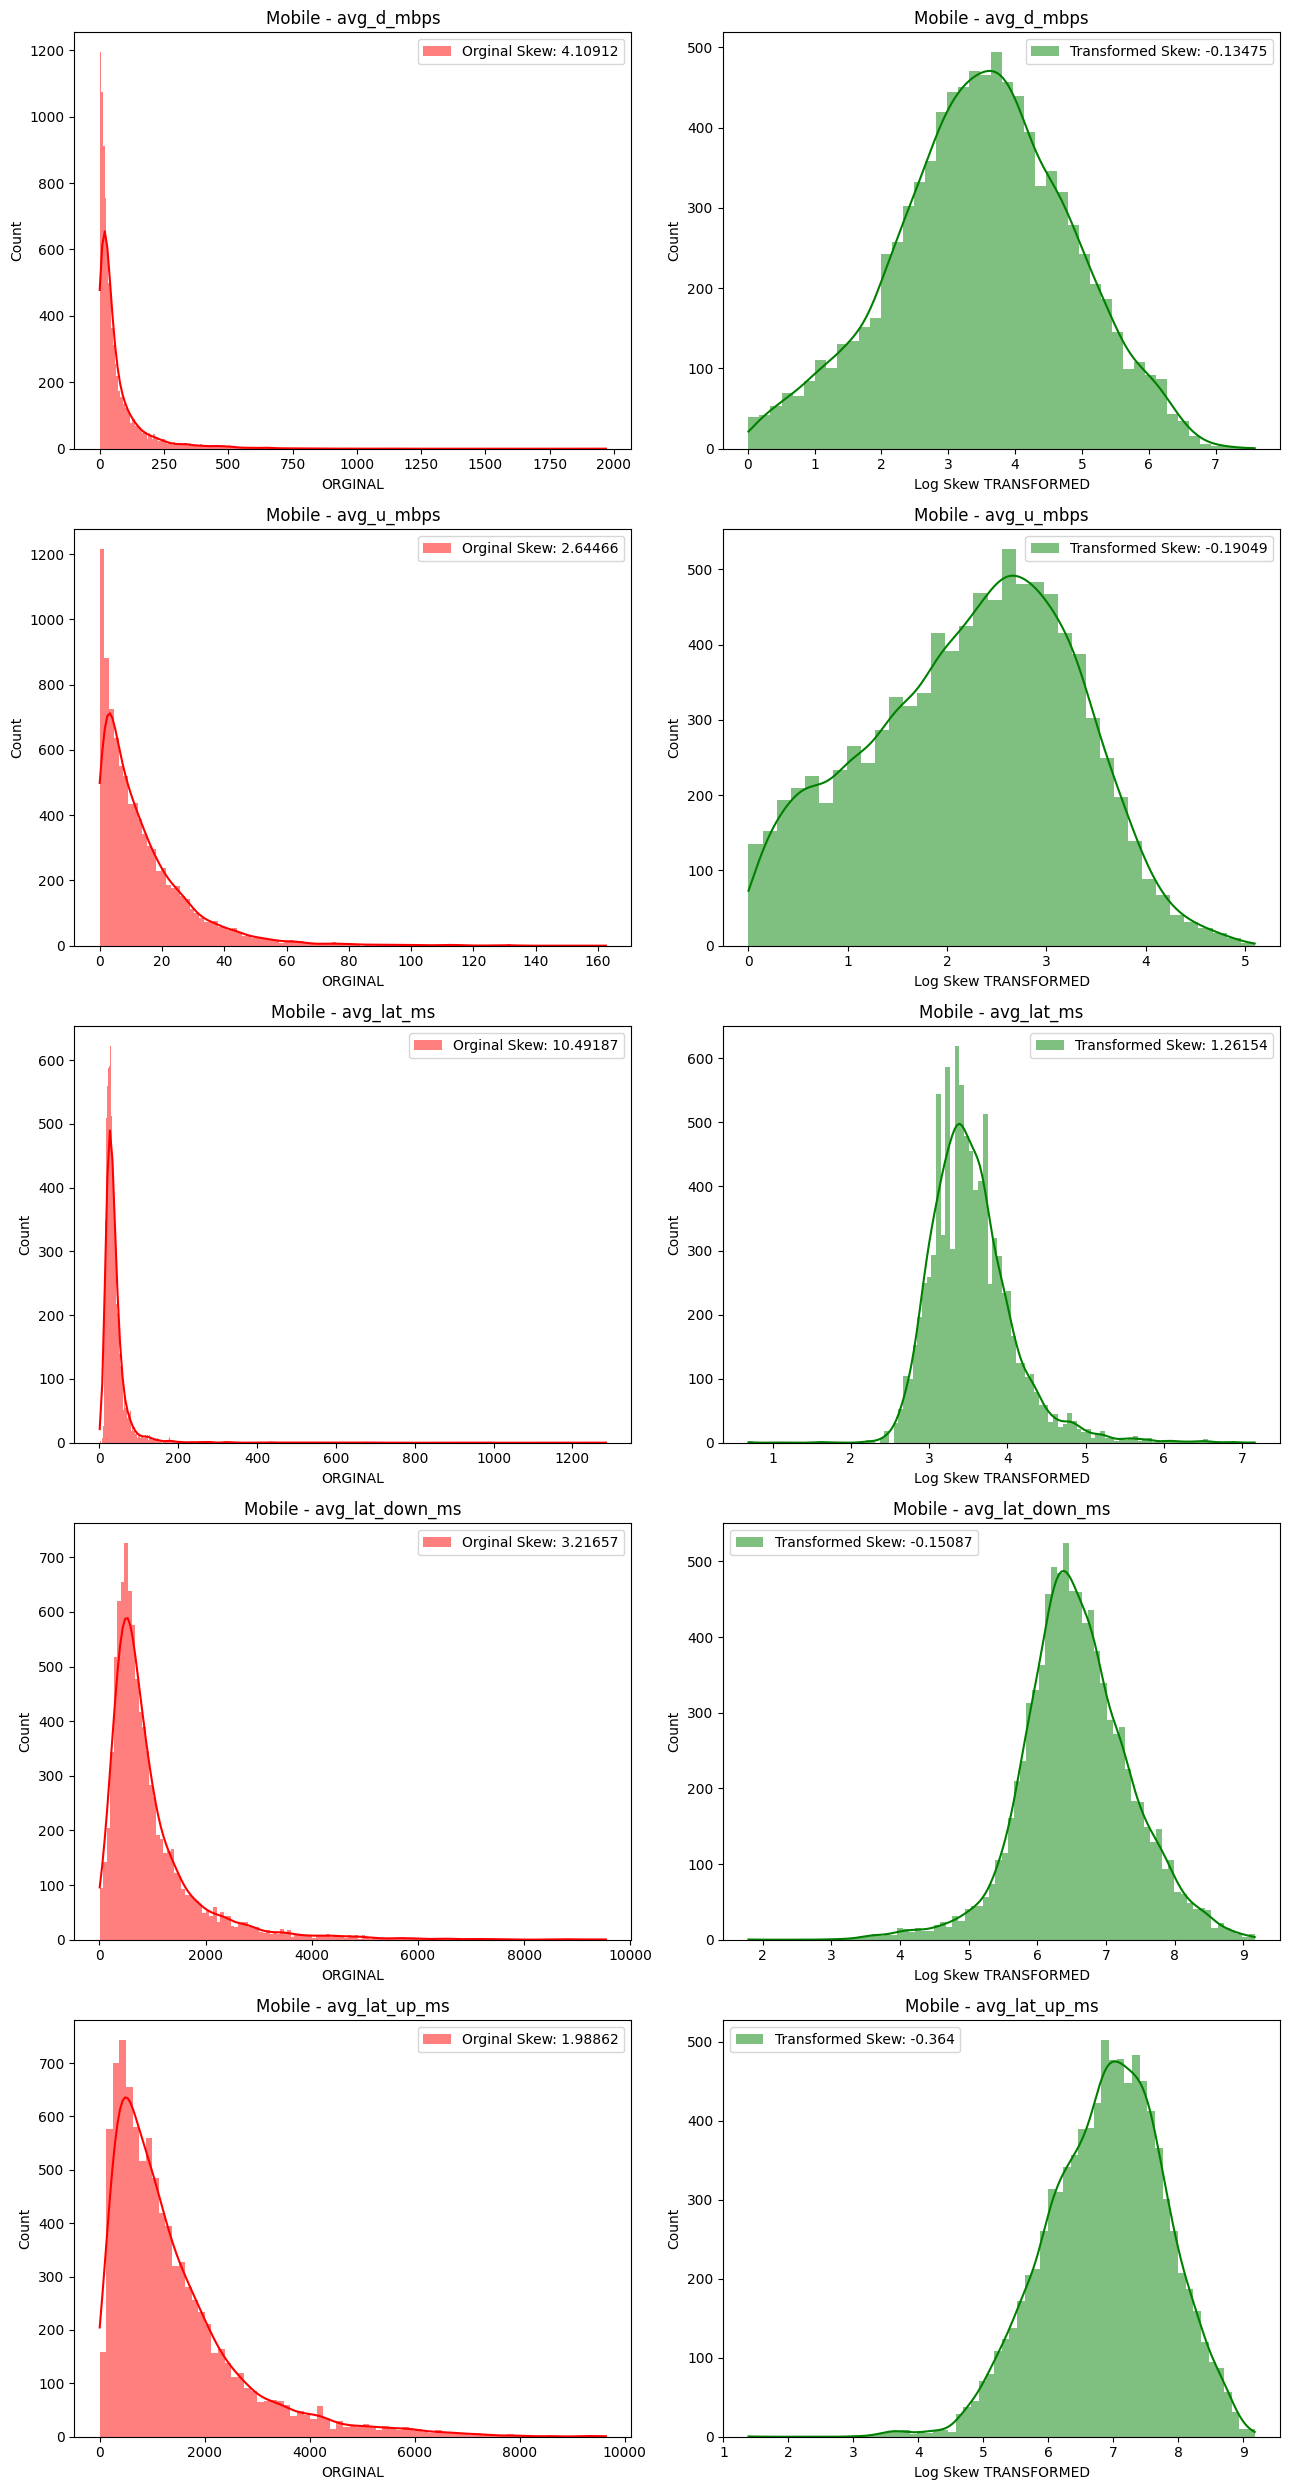

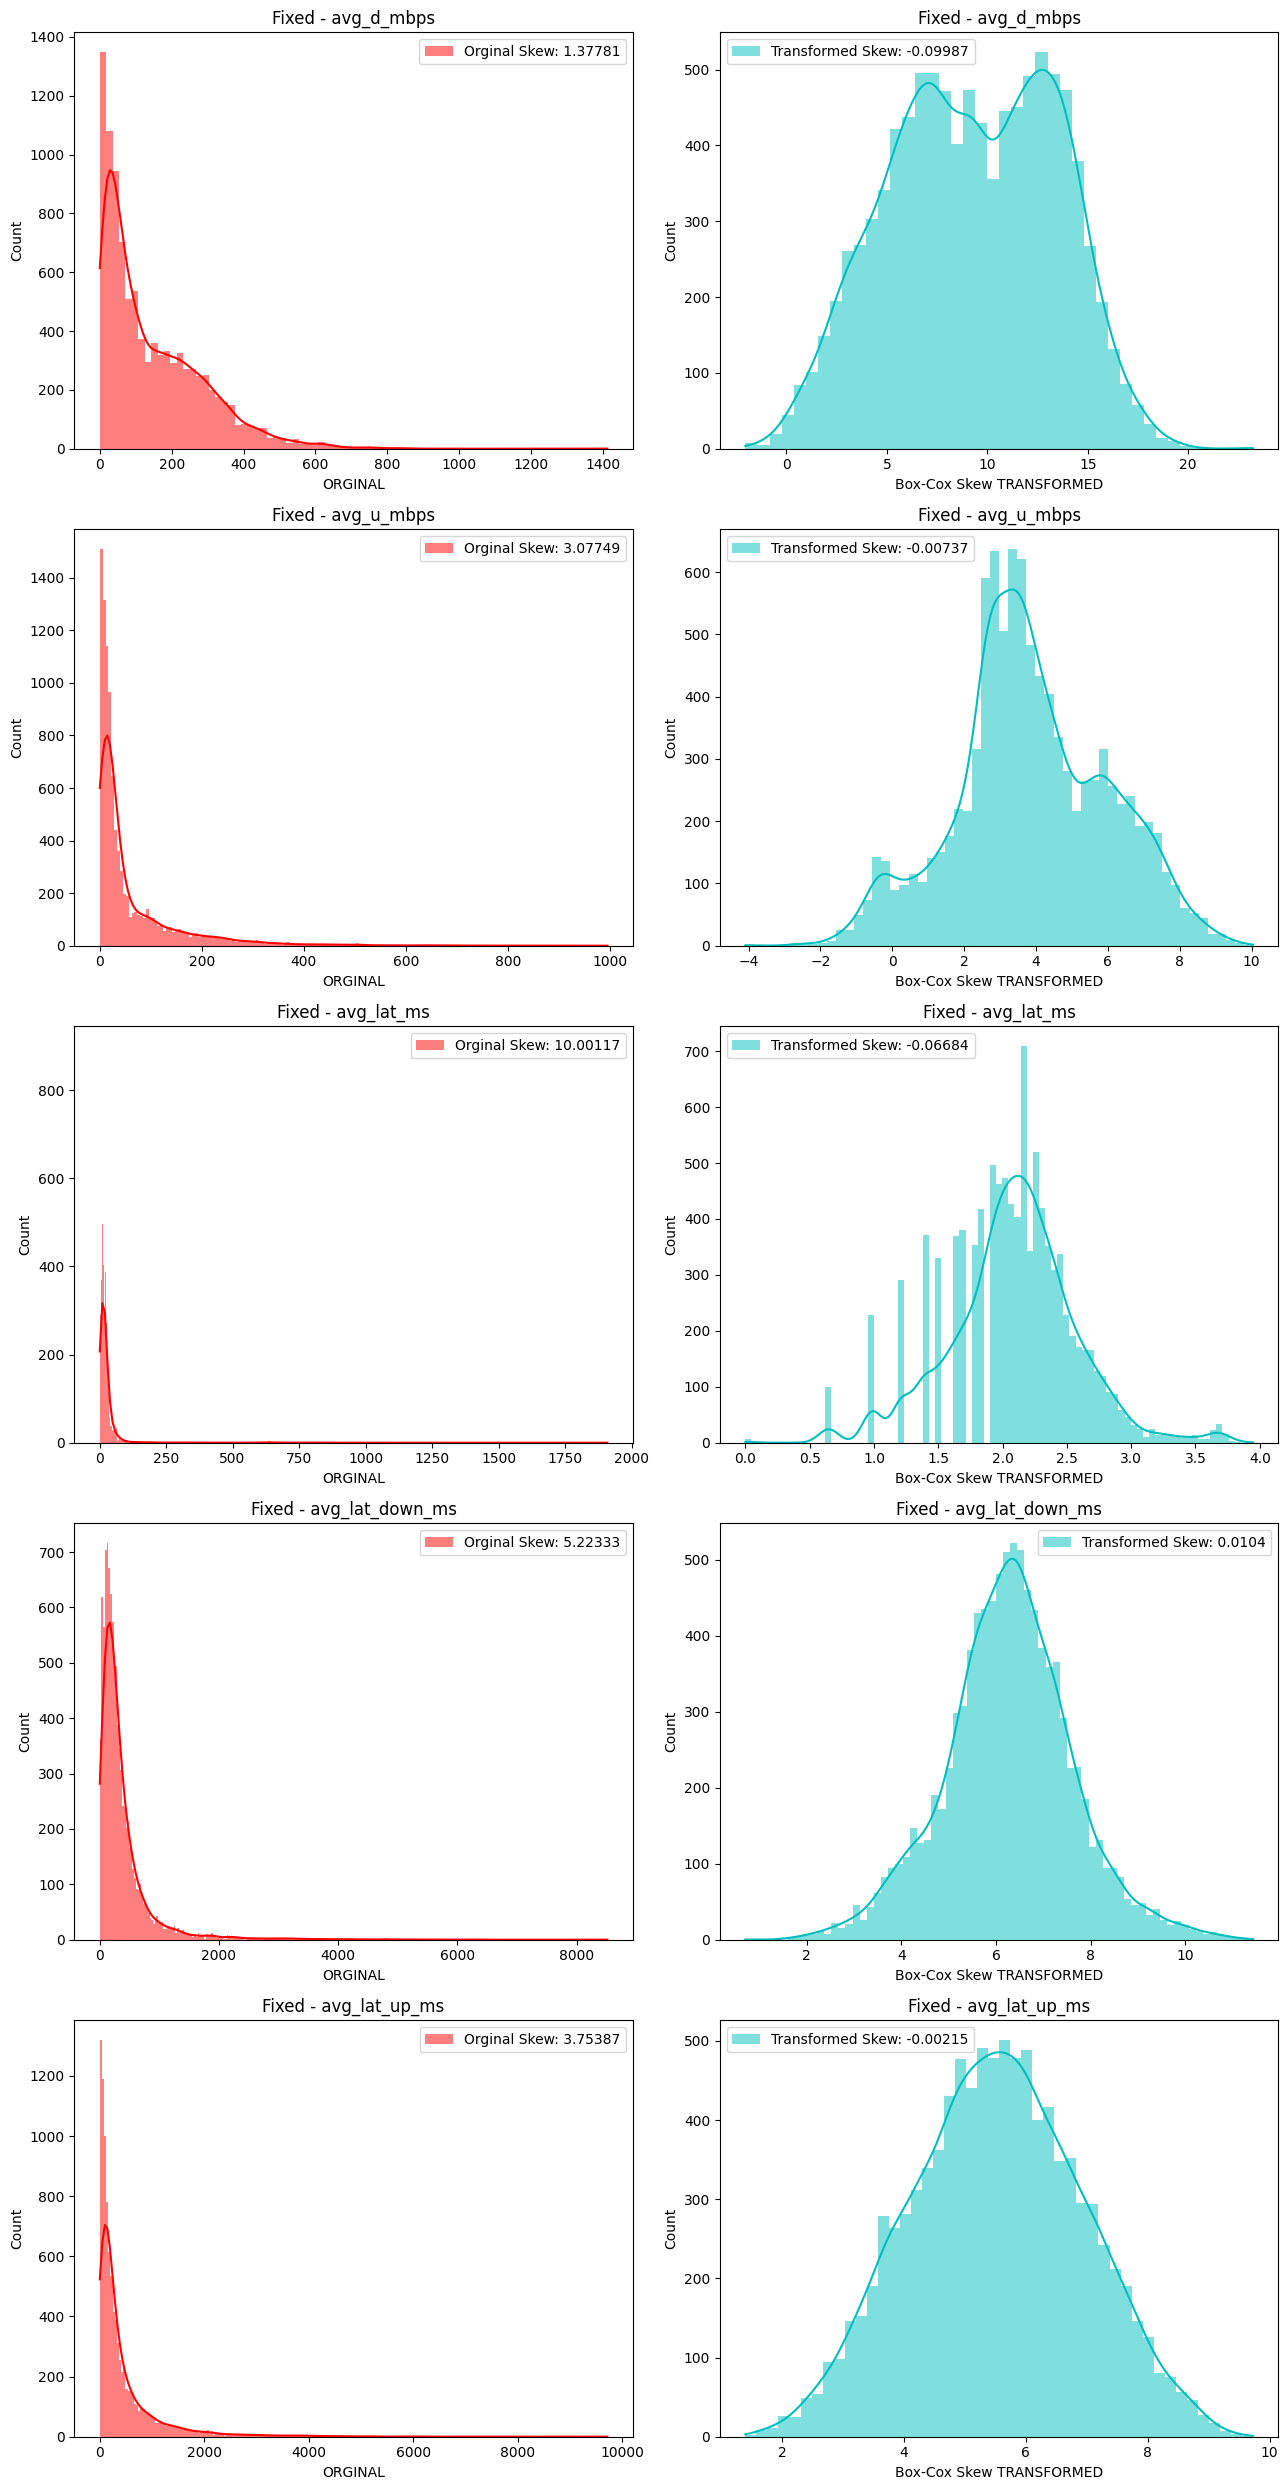

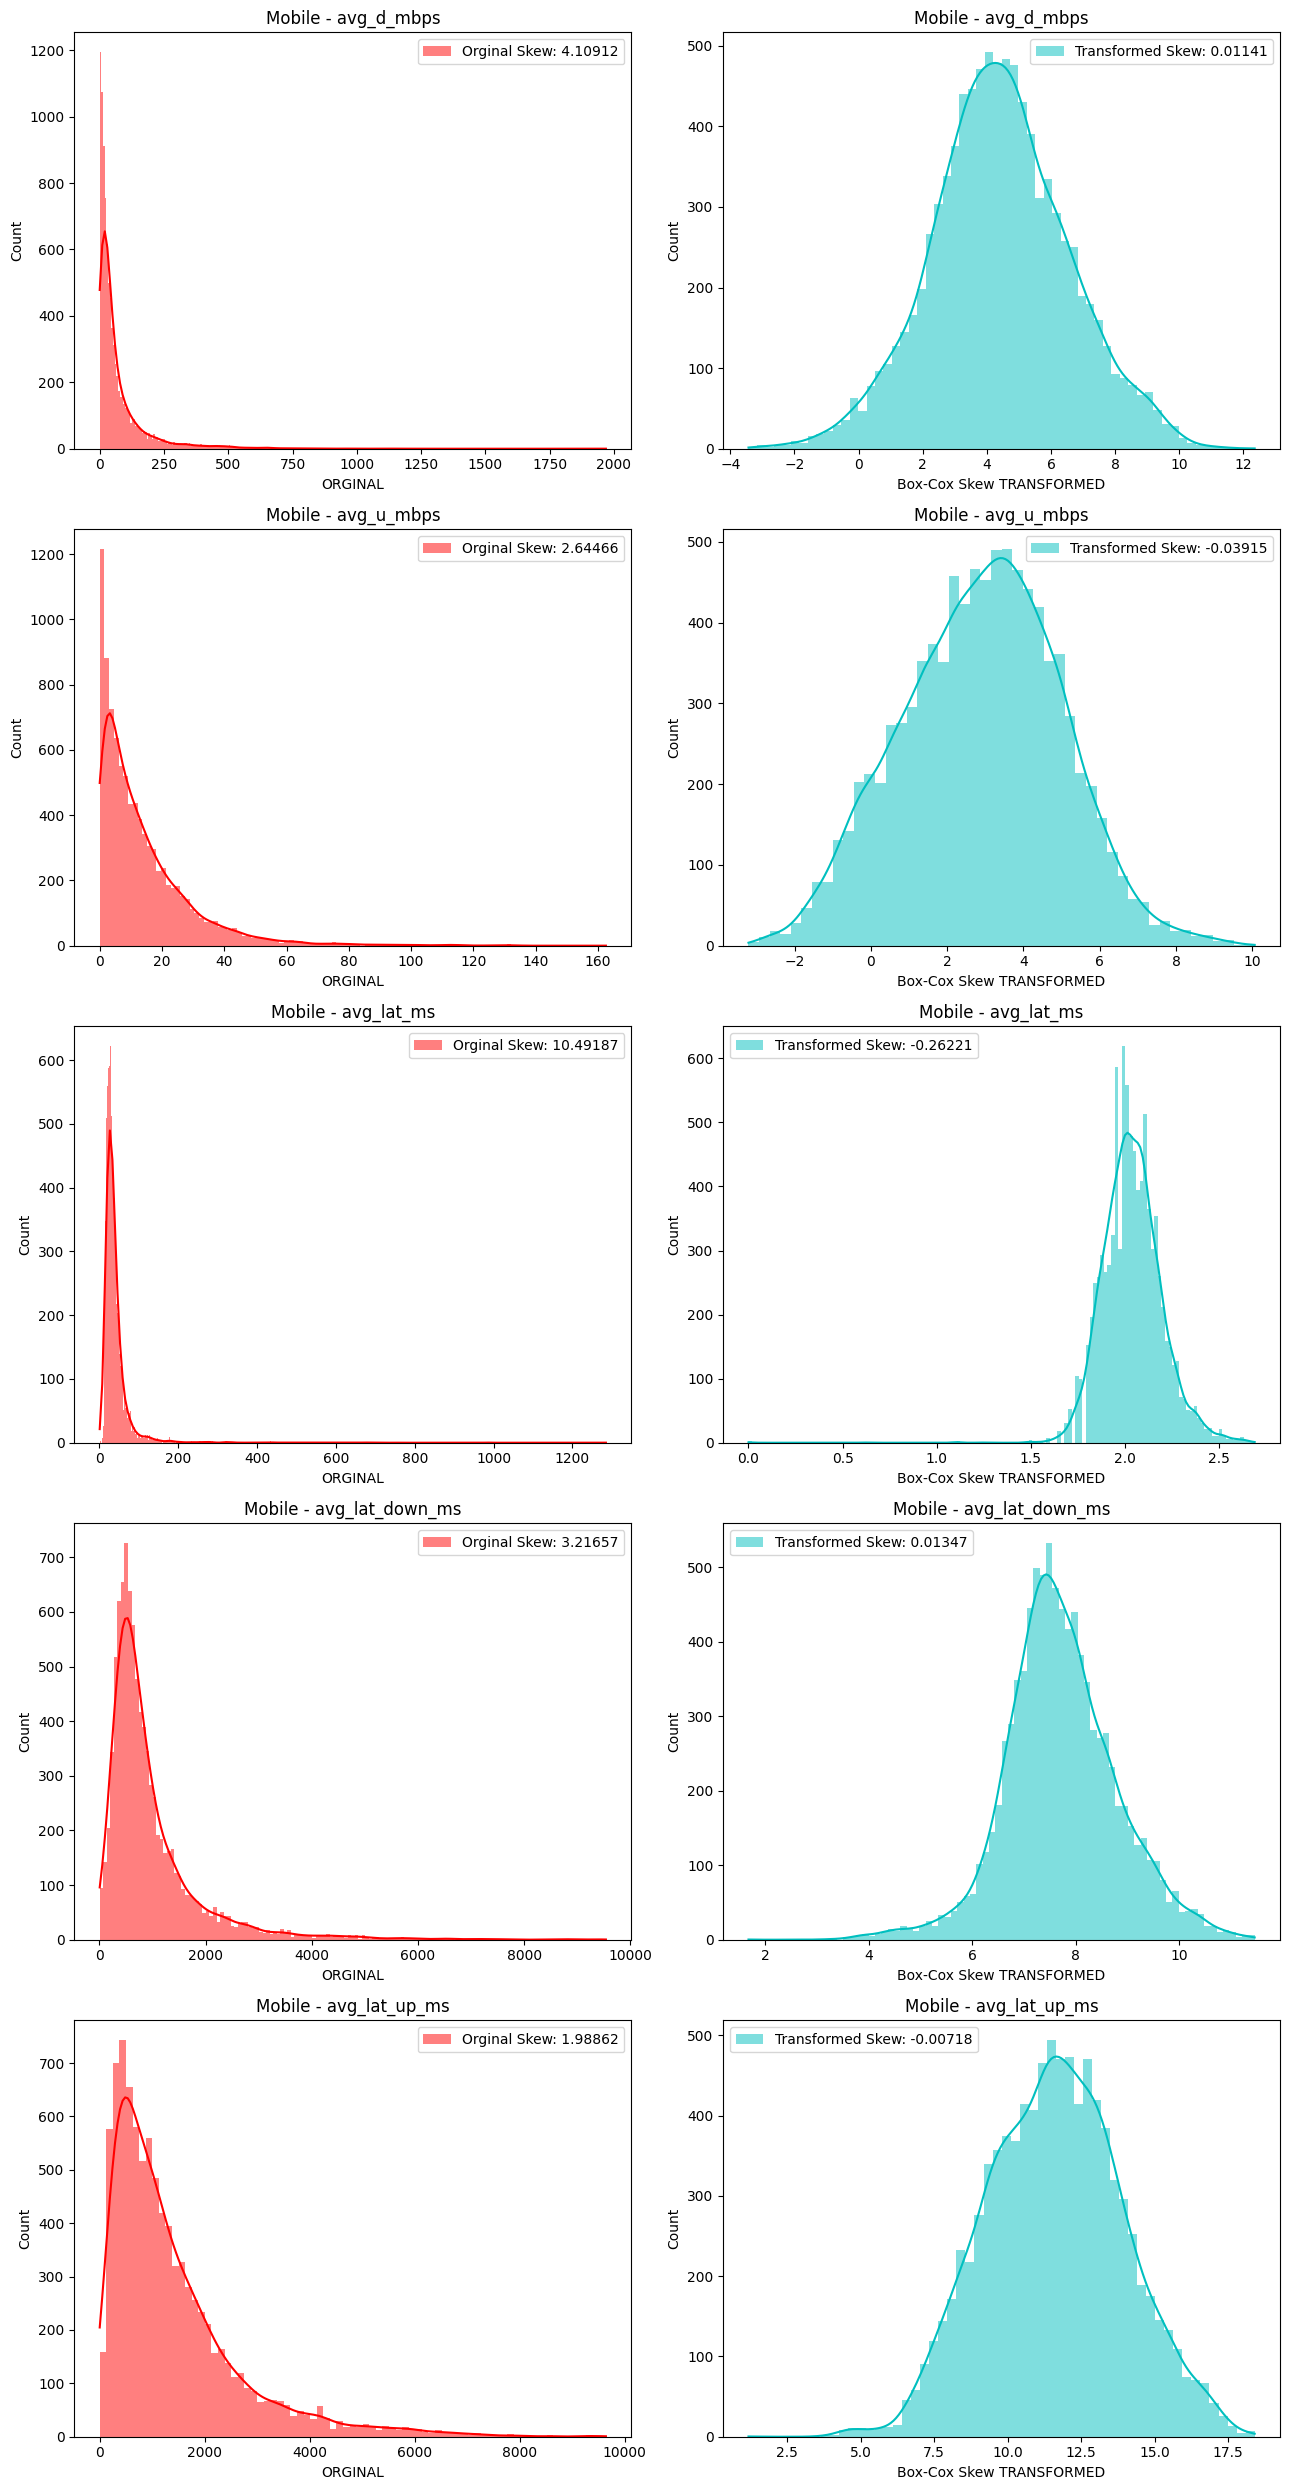

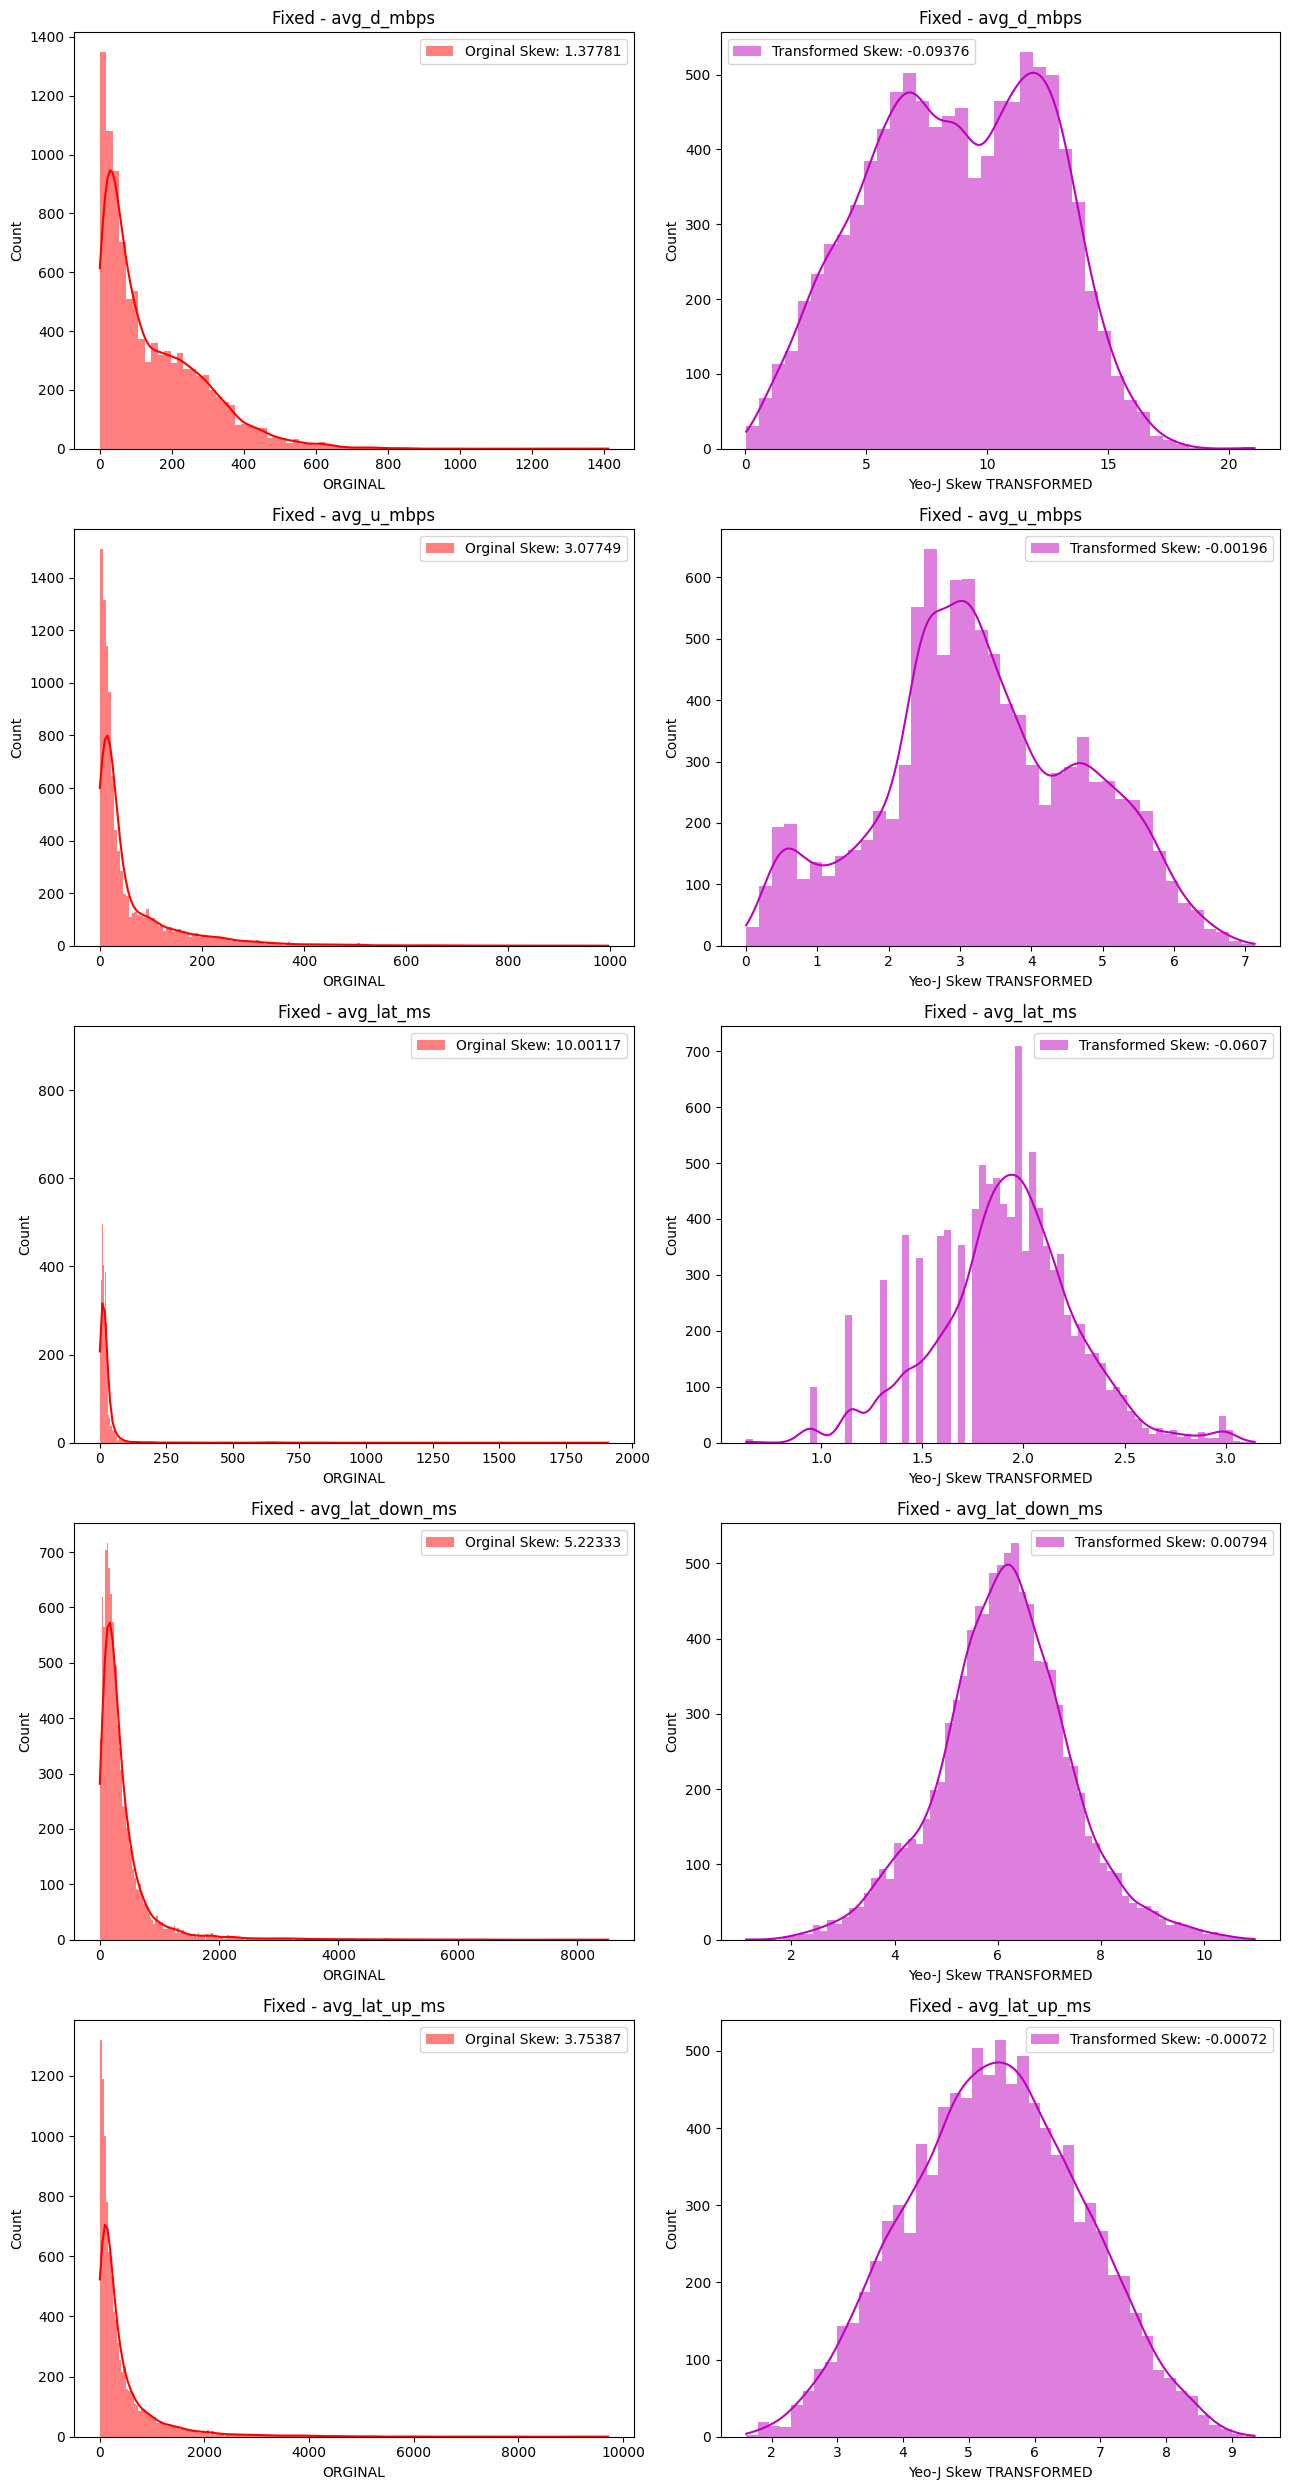

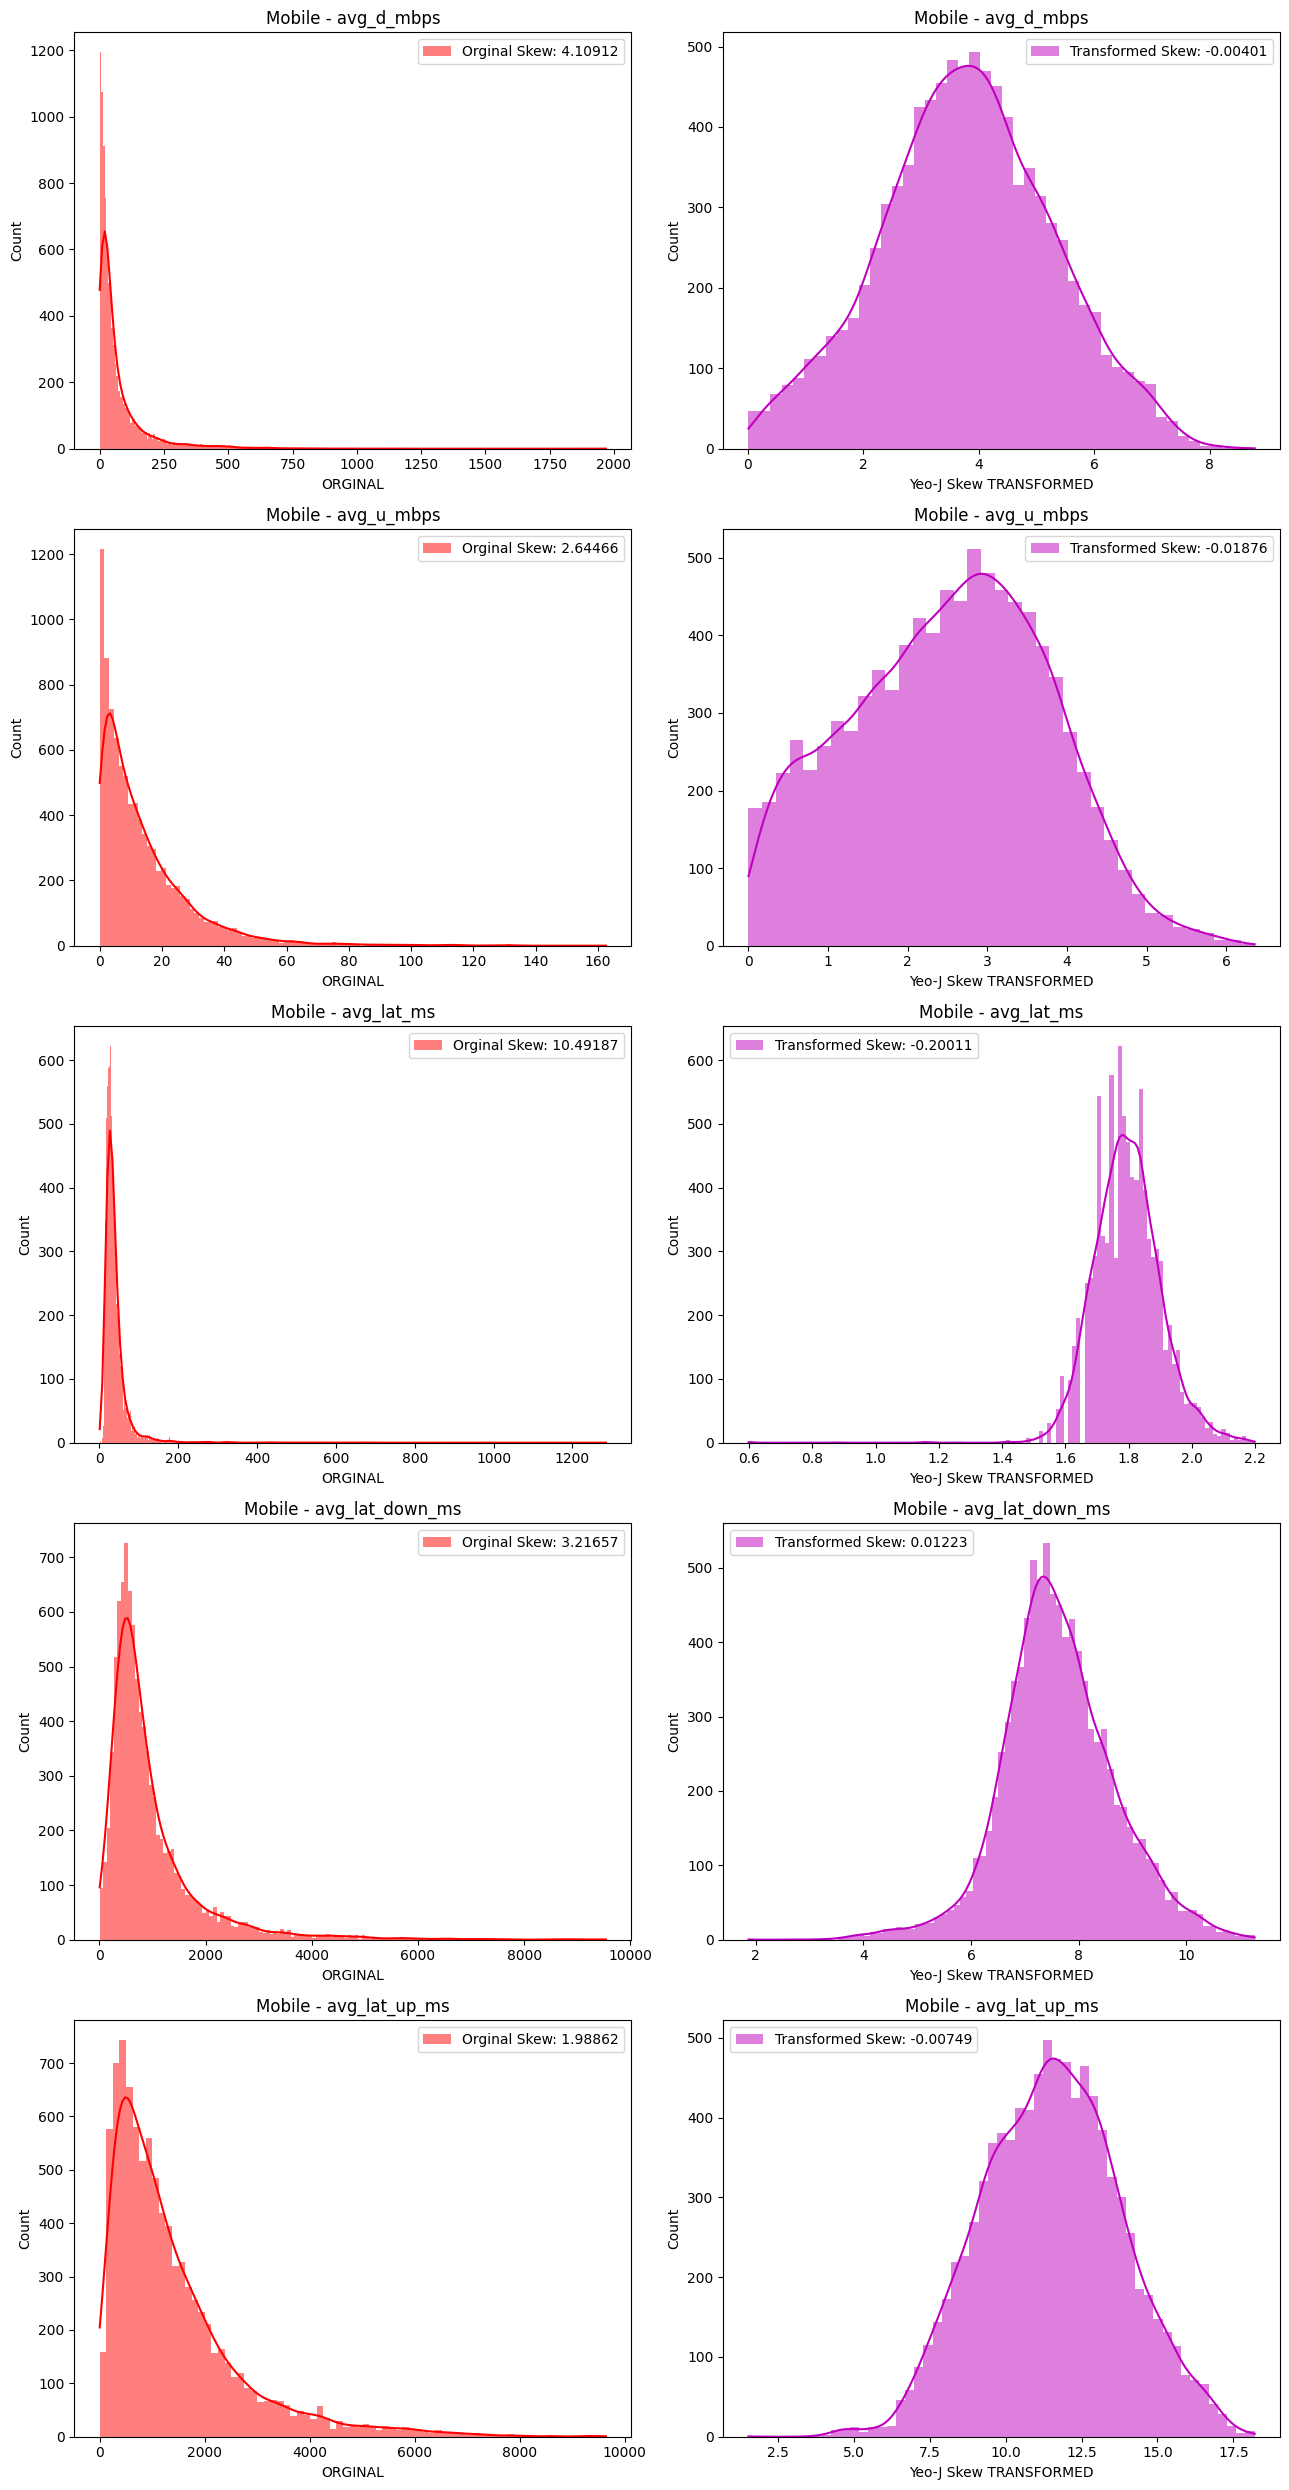

In [39]:
#| label: fig-transcomp
#| fig-cap: "Comparisons of data transformations on distributions"
#| fig-subcap:
#|   - "Original vs Sqrt transformed on fixed network"
#|   - "Original vs Sqrt transformed on mobile network"
#|   - "Original vs Log transformed on fixed network"
#|   - "Original vs Log transformed on mobile network"
#|   - "Original vs Box-Cox transformed on fixed network"
#|   - "Original vs Box-Cox transformed on mobile network"
#|   - "Original vs Yeo-Johnson transformed on fixed network"
#|   - "Original vs Yeo-Johnson transformed on mobile network"
#| column: page 
#| code-fold: true

# Define a list of colors for the transformations
trans_colors = ['y', 'g', 'c', 'm']

# Define a dictionary that maps transformation names to transformation functions
trans_funcs = {
    'Sqrt Skew': np.sqrt,  # Square root transformation
    'Log Skew': np.log1p,  # Logarithmic transformation
    'Box-Cox Skew': stats.boxcox,  # Box-Cox transformation
    'Yeo-J Skew': stats.yeojohnson  # Yeo-Johnson transformation
}

# Loop over each transformation in the 'trans_funcs' dictionary
for transform in trans_funcs:
    # Loop over each key in the 'dfs' dictionary
    for key in dfs:
        # Get the number of columns in the dataframe corresponding to the current key
        num_cols = len(dfs[key][0].columns)
        # Create a subplot with 'num_cols' rows and 2 columns, and set the figure size
        fig, ax = plt.subplots(num_cols, 2, figsize=(13, 5*num_cols))
        
        # Loop over each column in the dataframe corresponding to the current key
        for i, col in enumerate(dfs[key][0]):
            # Apply the transformation to the column
            if transform in ['Box-Cox Skew', 'Yeo-J Skew']:
                # For Box-Cox and Yeo-Johnson transformations, the function returns two values
                target, _ = trans_funcs[transform](dfs[key][0][col])
            else:
                # For other transformations, the function returns one value
                target = trans_funcs[transform](dfs[key][0][col])

            # Calculate the skewness of the transformed data
            transformed_skew = np.round(stats.skew(target),5)

            # Store the skewness in the 'trans_skews' dictionary
            trans_skews[col][key][transform] = transformed_skew

            # Plot a histogram of the original data
            sns.histplot(dfs[key][0][col], label='Orginal Skew: {0}'.format(trans_skews[col][key]['Org Skew']), color="r", ax=ax[i][0], kde=True, edgecolor=None)
            ax[i][0].legend()
            ax[i][0].set_xlabel('ORGINAL')
            ax[i][0].set_title(key+' - '+col)

            # Plot a histogram of the transformed data
            sns.histplot(target, label='Transformed Skew: {0}'.format(transformed_skew), color=trans_colors[trans_list.index(transform)-1], ax=ax[i][1], kde=True, edgecolor=None)
            ax[i][1].legend()
            ax[i][1].set_xlabel(transform + ' TRANSFORMED')
            ax[i][1].set_title(key+' - '+col)
        
        # Adjust the padding between and around the subplots
        fig.tight_layout()
        # Display the figure
        plt.show()

In [271]:
#| label: tbl-transskews
#| tbl-cap: "Comparison of original skew with data transformation skews on both networks"
#| tbl-subcap:
#|   - "avg_d_mbps"
#|   - "avg_u_mbps"
#|   - "avg_lat_ms"
#|   - "avg_lat_down_ms"
#|   - "avg_lat_up_ms"
#| column: page
#| code-fold: true

# Loop over each key in the trans_skews dictionary
for col in trans_skews.keys():
    # Create a DataFrame from the 'trans_skews' dictionary
    # The DataFrame will have a multi-level index with the column name and the network type
    df_skews = pd.DataFrame.from_dict({(col,j): trans_skews[col][j] 
                            for j in trans_skews[col].keys()},
                        orient='index')

    # Reset the second level of the index of the DataFrame, moving it to the columns
    df_skews.reset_index(level=1, inplace=True)

    # Rename the columns
    df_skews.columns = ['Network Type']+trans_list

    # Create a table from the DataFrame and display it
    fig =  ff.create_table(df_skews, index=True)
    fig.show()

In [41]:
# Initialize a dictionary to store the total absolute differences for each transformation
total_diffs = {trans: 0 for trans in trans_funcs}

# Iterate over the trans_skews dictionary
for col in trans_skews:
    for key in trans_skews[col]:
        for trans in trans_skews[col][key]:
            # Exclude 'Org Skew' from the calculation
            if trans != 'Org Skew':
                # Calculate the absolute difference between the skewness and 0
                diff = abs(trans_skews[col][key][trans])
                # Add the difference to the total for the transformation
                total_diffs[trans] += diff

# Find the transformation with the smallest total difference
best_trans = min(total_diffs, key=total_diffs.get)

# Print the transformation that got closer to a skew of 0 overall
print('The transformation that got closer to a skew of 0 overall is:', best_trans)

The transformation that got closer to a skew of 0 overall is: Yeo-J Skew


In [42]:
# Initialize Yeo-Johnson transformation dict
yeoj_dfs = dict()

# Iterate over the dfs dictionary
for key in dfs:
    # Copy the original DataFrame and reset the index
    df_transformed = dfs[key][0].copy().reset_index(drop=True)
    
    # Apply the Yeo-Johnson transformation to each column
    for col in df_transformed:
        df_transformed[col], _ = stats.yeojohnson(df_transformed[col])
    
    # Add the transformed DataFrame to the dictionary entry
    yeoj_dfs[key] = df_transformed
    print(yeoj_dfs[key])
    del(df_transformed)

      avg_d_mbps  avg_u_mbps  avg_lat_ms  avg_lat_down_ms  avg_lat_up_ms
0       8.972164    4.759714    1.500592         5.364215       4.594474
1      11.504014    3.594225    2.152917         5.325130       5.469041
2       9.121034    2.338349    2.006061         5.997121       5.157019
3      11.159330    4.875059    2.049368         6.346418       4.583702
4      10.238558    2.695041    2.028408         5.758639       6.193776
...          ...         ...         ...              ...            ...
9809   11.556506    4.850887    1.898827         6.751223       6.489121
9810    6.696179    2.960429    2.252471         5.744407       3.812195
9811    2.457252    0.387996    2.397371        10.894972       5.784466
9812    9.303431    4.982478    1.641398         4.972823       5.450639
9813   10.094487    3.830499    1.928811         5.483558       6.399159

[9814 rows x 5 columns]
      avg_d_mbps  avg_u_mbps  avg_lat_ms  avg_lat_down_ms  avg_lat_up_ms
0       4.239305    3.3516

/tmp/ipykernel_243718/4227647232.py:22: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



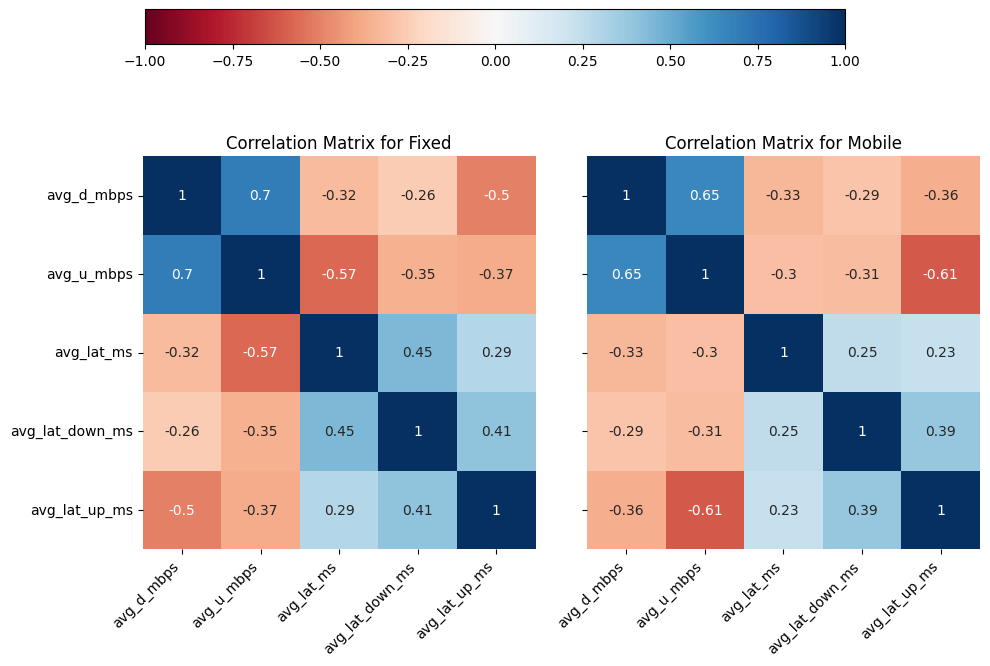

In [43]:
#| label: fig-transheatmaps
#| fig-cap: "Correlation heatmap matrices for both networks after Yeo-Johnson transformation"
#| code-fold: true

# Create a subplot with 1 row and 2 columns, 
# sharing the y-axis, and set the figure size
fig, axes_mat = plt.subplots(1, 2, sharey=True, figsize=(10, 7))

# Loop over each key in the 'yeoj_dfs' dictionary and the axes in 'axes_mat'
for key, ax in zip(yeoj_dfs, axes_mat):
    # Create a correlation matrix of all the numerical columns
    corr = yeoj_dfs[key].corr()

    # Visualize the correlation matrix with a heatmap
    sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax, cbar=False)

    # Rotate and align labels on the x-axis
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title('Correlation Matrix for '+key)

# Create a colorbar for the whole figure
norm = Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])

# Add an axes to the figure for the colorbar at position [left, top, width, height]
cbar_ax = fig.add_axes([0.15, 0.95, 0.7, 0.05])  # [left, top, width, height]
fig.colorbar(sm, orientation='horizontal', cax=cbar_ax)

# Adjust the padding between and around the subplots
plt.tight_layout()
# Display the figure
plt.show()

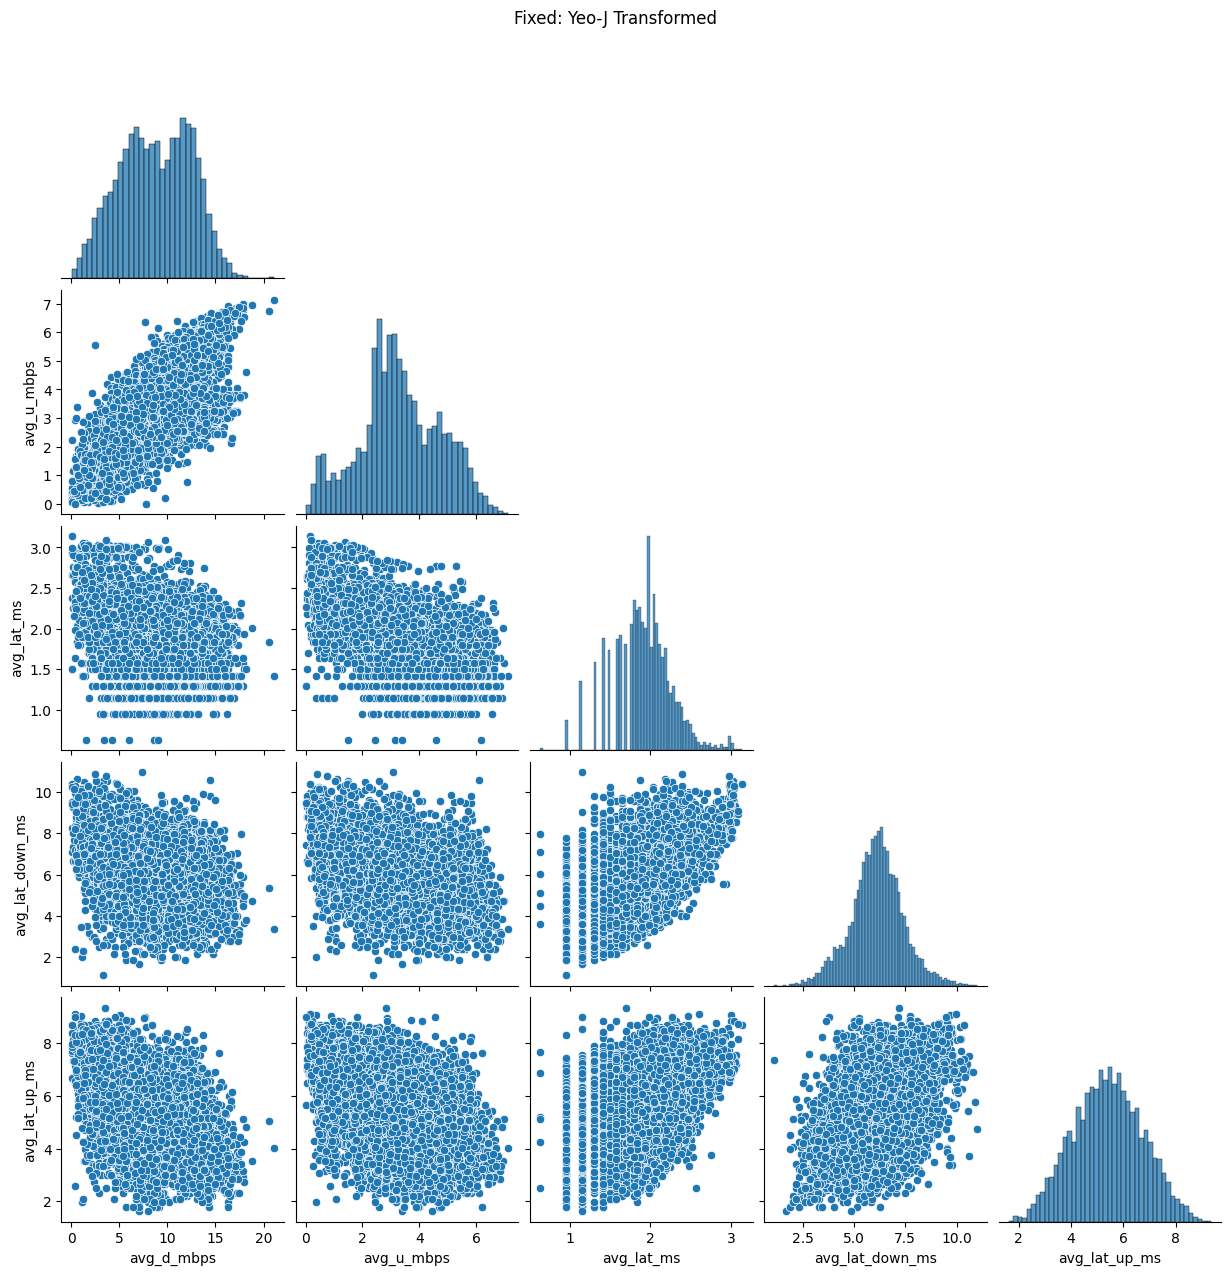

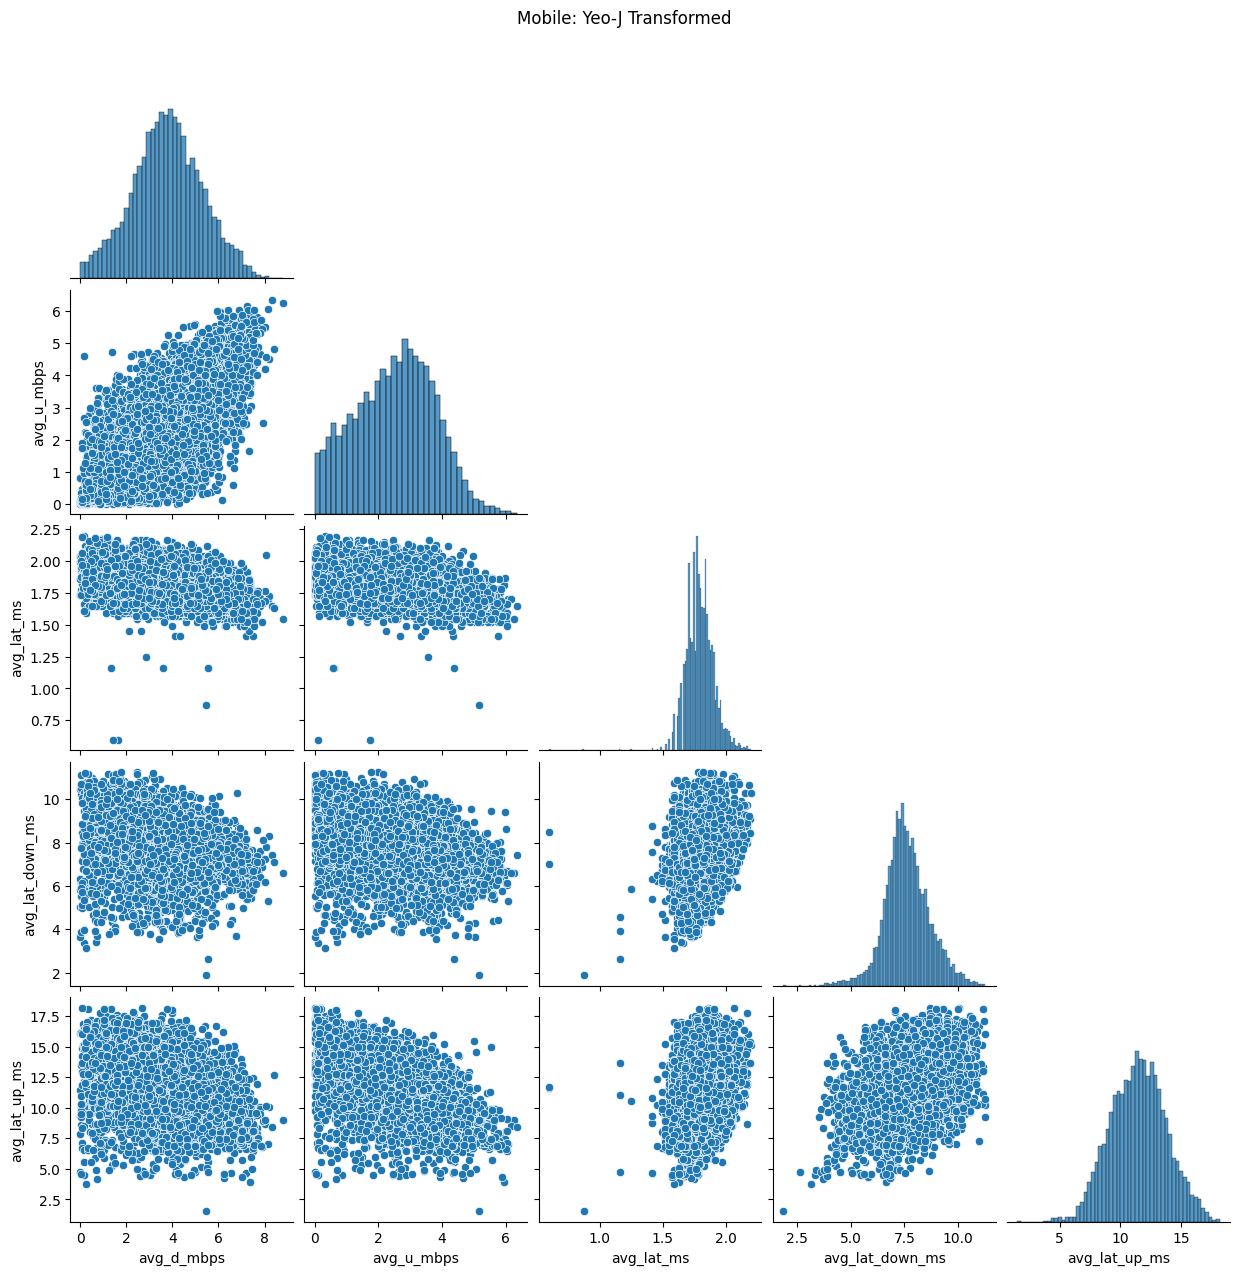

In [44]:
#| label: fig-transpairs
#| fig-cap: "Pairplots on Yeo-Johnson transformed data"
#| fig-subcap:
#|  - "Fixed network"
#|  - "Mobile network"
#| layout-ncol: 2
#| code-fold: true

# Loop over each key in the 'yeoj_dfs' dictionary
for key in yeoj_dfs:
    # Create a pairplot of the dataframe corresponding to the current key
    # 'corner=True' means that only the lower triangle of the plot will be shown
    g = sns.pairplot(yeoj_dfs[key], corner=True)
    
    # Set the title of the figure, adding a small space above the title
    g.fig.suptitle(key+': Yeo-J Transformed', y=1.02)
    
    # Display the figure
    plt.show()

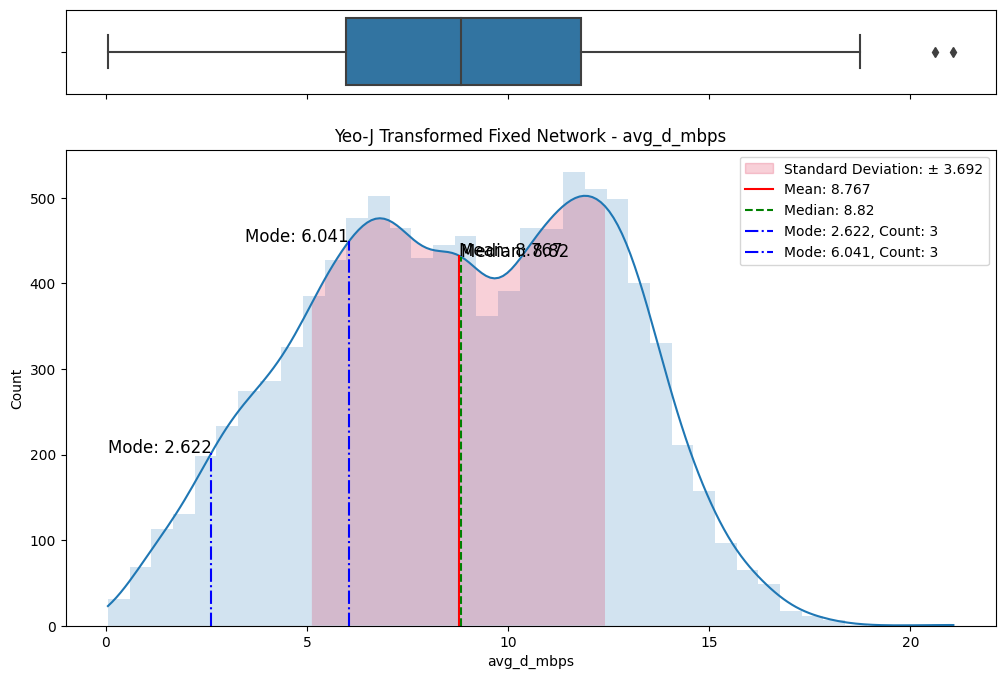

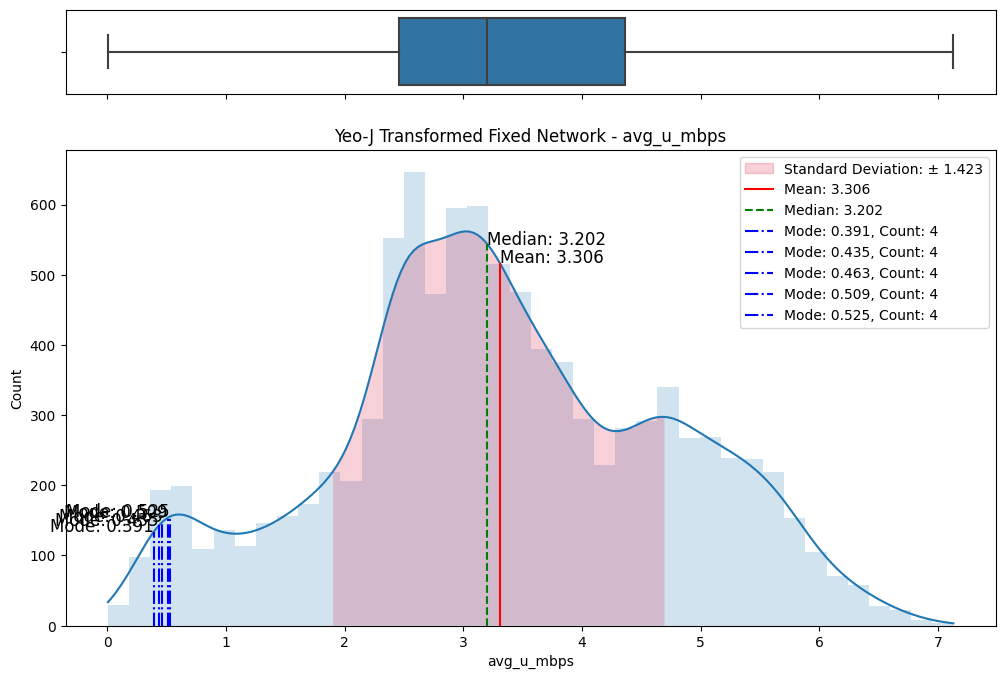

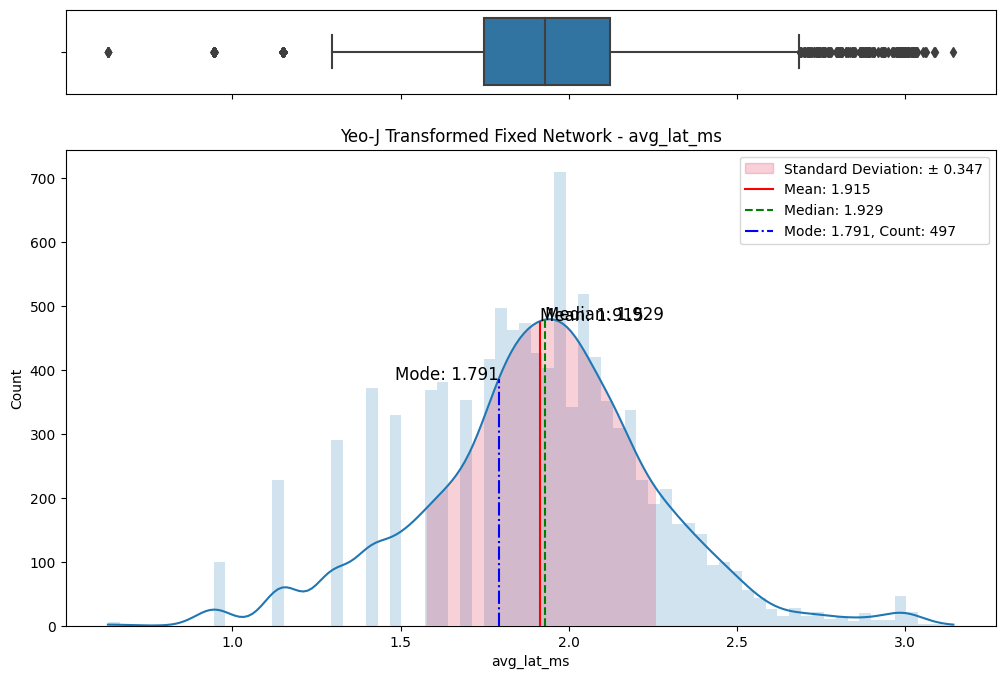

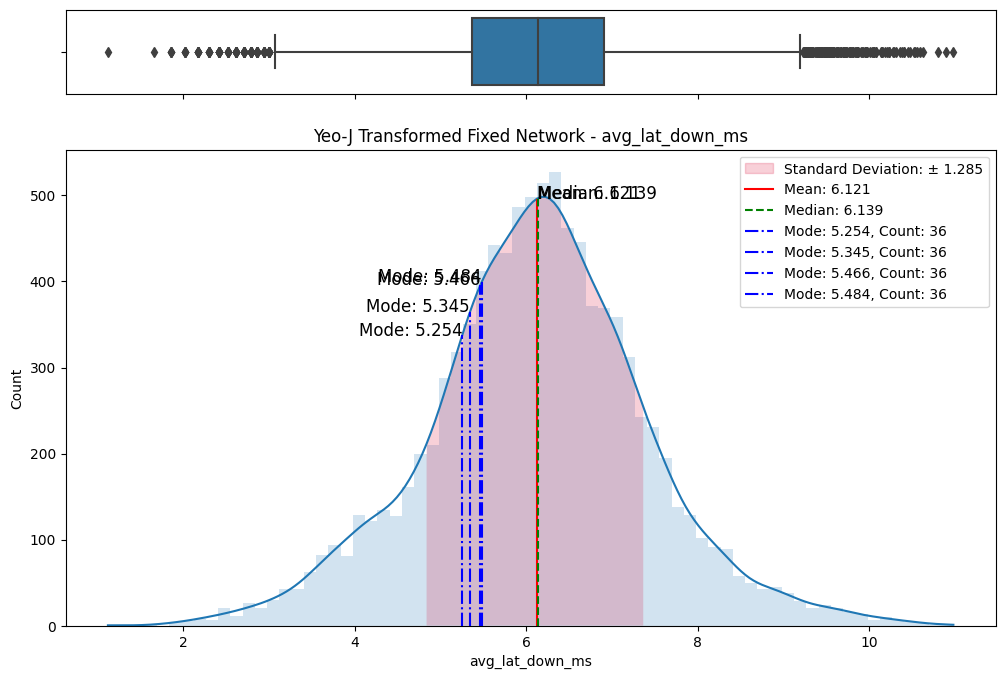

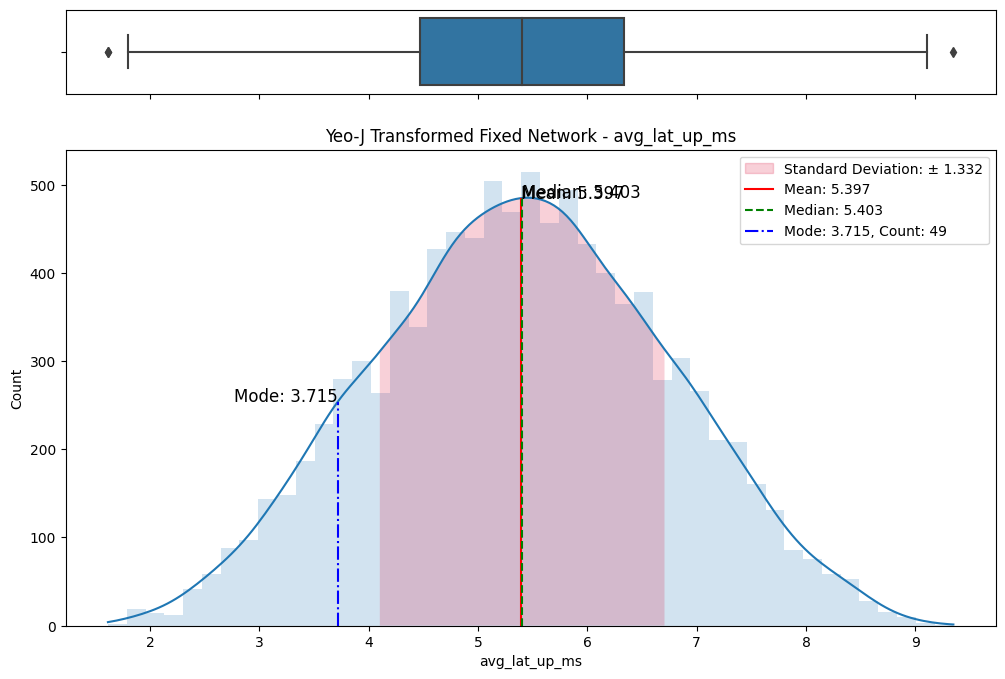

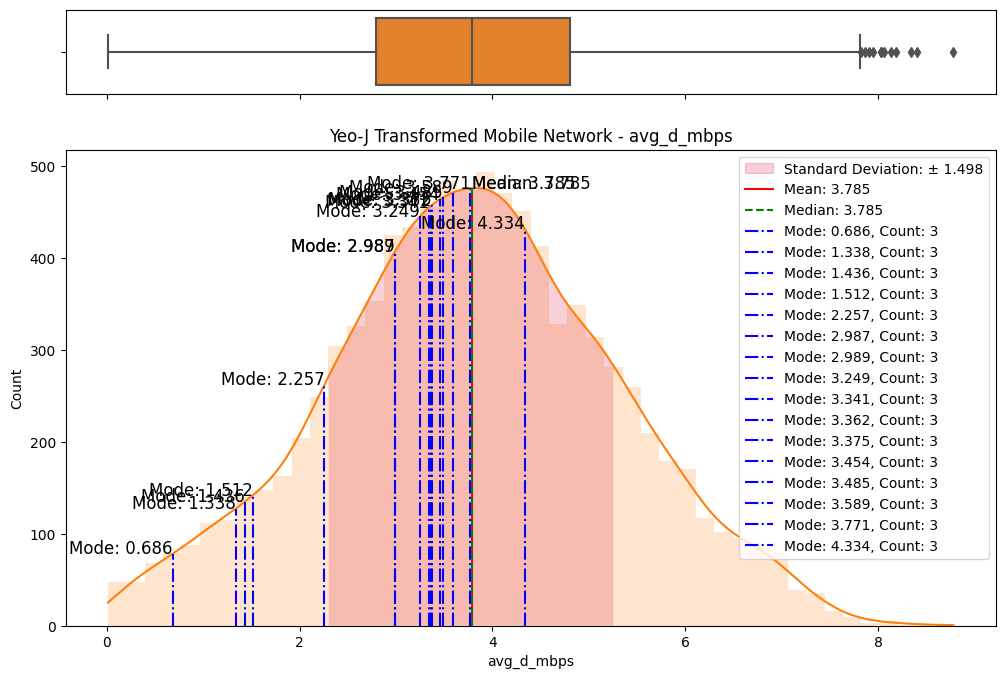

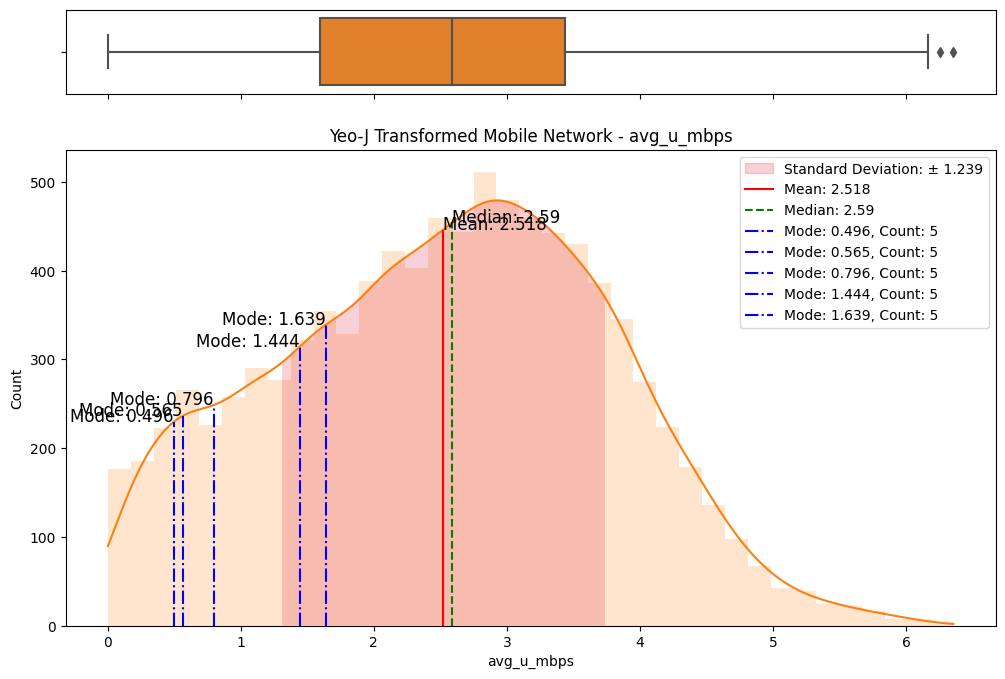

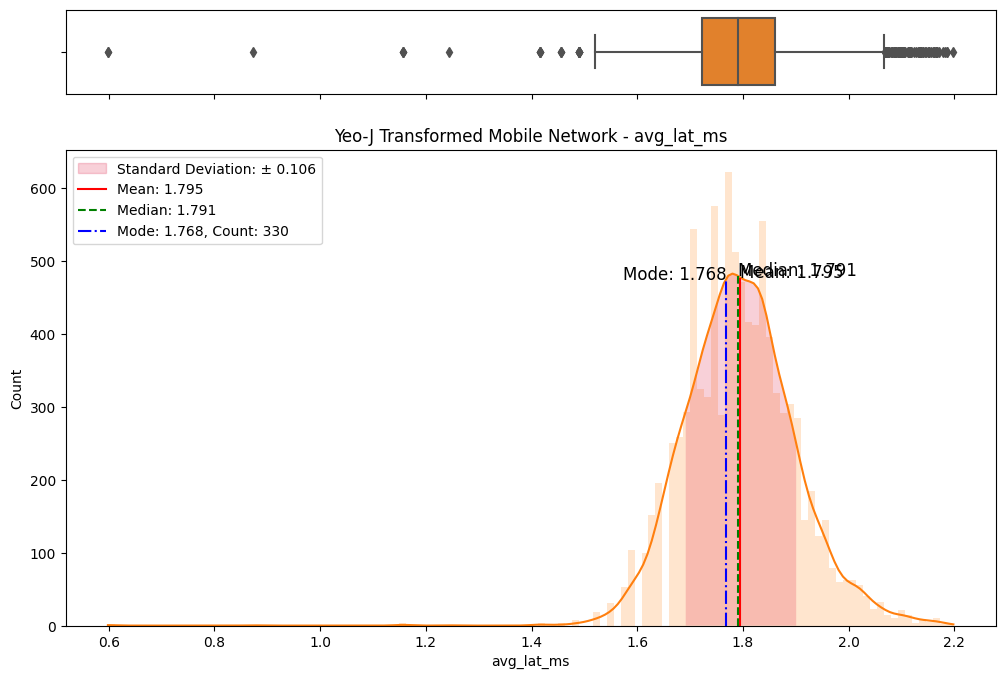

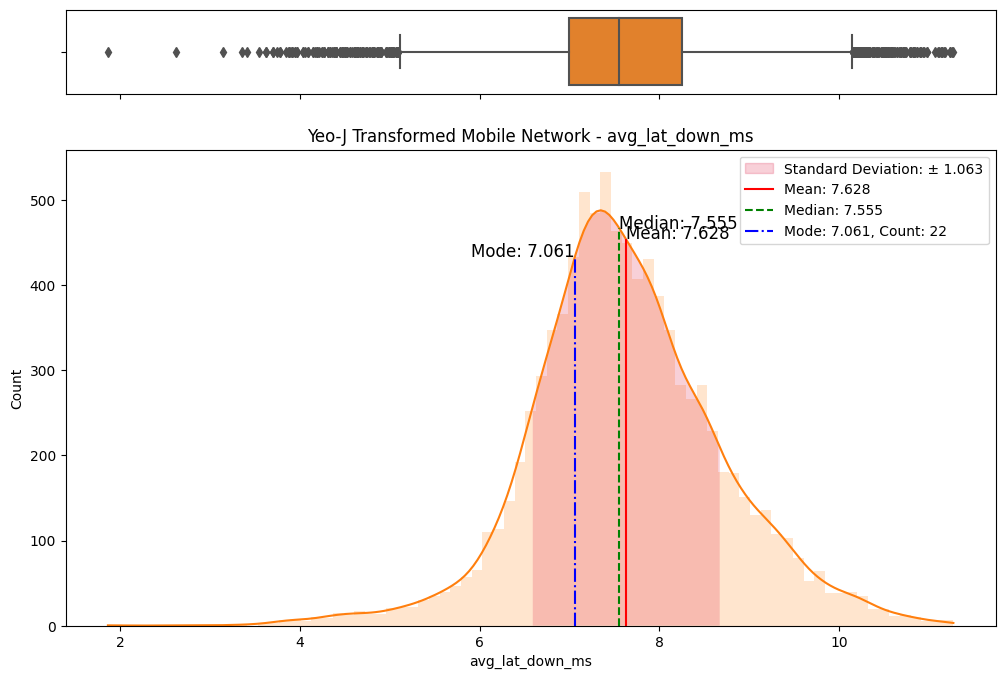

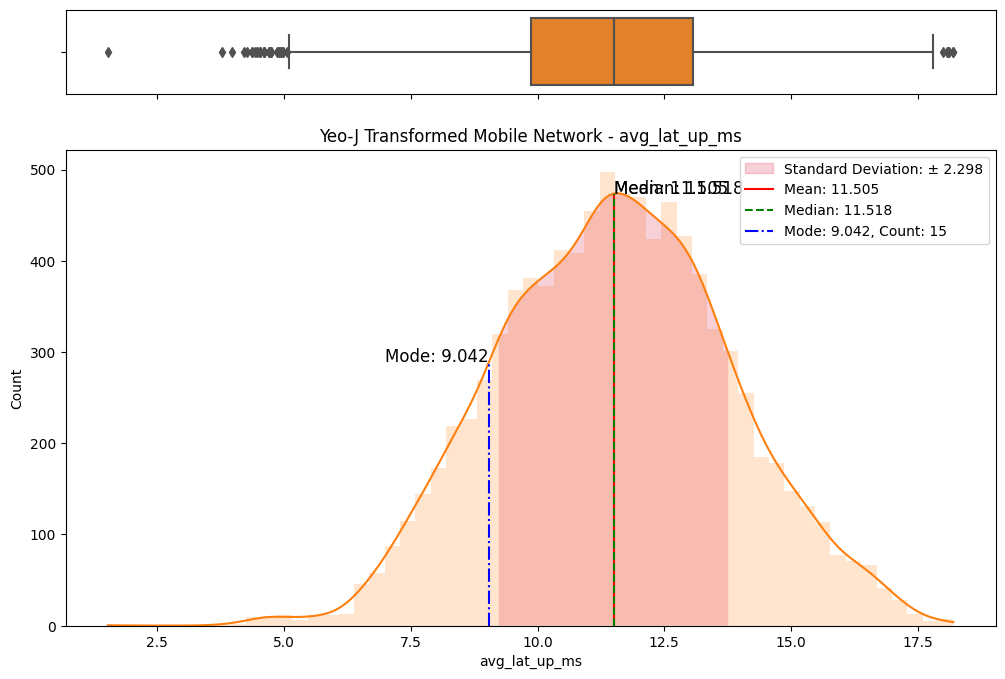

In [45]:
#| label: fig-yeojdists
#| fig-cap: "Box and KDE plots of Yeo-Johnson transformed distributions"
#| fig-subcap:
#|   - "`avg_d_mbps` for Yeo-Johnson transformed fixed network"
#|   - "`avg_u_mbps` for Yeo-Johnson transformed fixed network"
#|   - "`avg_lat_ms` for Yeo-Johnson transformed fixed network"
#|   - "`avg_lat_down_ms` for Yeo-Johnson transformed fixed network"
#|   - "`avg_lat_up_ms` for Yeo-Johnson transformed fixed network"
#|   - "`avg_d_mbps` for Yeo-Johnson transformed mobile network"
#|   - "`avg_u_mbps` for Yeo-Johnson transformed mobile network"
#|   - "`avg_lat_ms` for Yeo-Johnson transformed mobile network"
#|   - "`avg_lat_down_ms` for Yeo-Johnson transformed mobile network"
#|   - "`avg_lat_up_ms` for Yeo-Johnson transformed mobile network"
#| column: page 
#| code-fold: true

# Loop over each key in the 'yeoj_dfs' dictionary
for key in yeoj_dfs.keys():
    # Loop over each column in the dataframe corresponding to the current key
    for col in yeoj_dfs[key].keys():
        # Calculate the mean, median, mode,
        # and standard deviation of the current column
        calc_stats = { 
            'mean': yeoj_dfs[key][col].mean(),
            'med': yeoj_dfs[key][col].median(),
            'mode': yeoj_dfs[key][col].mode(),
            'std': yeoj_dfs[key][col].std()
        }

        # Create a figure with a boxplot and a histogram, sharing the x-axis
        fig, (ax_box1, ax_hist1) = plt.subplots(2, sharex=True, figsize=(12, 8), gridspec_kw={"height_ratios": (.15, .85)})

        # Boxplot and Histplot for 'Fixed' net_type
        sns.boxplot(data=yeoj_dfs[key], x=col, color=dfs[key][1], ax=ax_box1)
        sns.histplot(data=yeoj_dfs[key], edgecolor=None, x=col, kde=True, color=dfs[key][1], alpha=0.2, ax=ax_hist1)

        # Get the x and y data of the kernel density estimate line
        kdeline = ax_hist1.lines[0]
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()

        # Add lines for mean, median, and mode
        ax_hist1.vlines(calc_stats['mean'], 0, np.interp(calc_stats['mean'], xs, ys), color='r', linestyle='-')
        ax_hist1.text(calc_stats['mean'], np.interp(calc_stats['mean'], xs, ys), 'Mean: '+str(calc_stats['mean'].round(3)), ha='left', fontsize=12)
        ax_hist1.vlines(calc_stats['med'], 0, np.interp(calc_stats['med'], xs, ys), color='g', linestyle='--')
        ax_hist1.text(calc_stats['med'], np.interp(calc_stats['med'], xs, ys), 'Median: '+str(calc_stats['med'].round(3)), ha='left', fontsize=12)
        ax_hist1.vlines(calc_stats['mode'], 0, np.interp(calc_stats['mode'], xs, ys), color='b', linestyle='-.')

        # Add labels for each mode
        for i in range(0,len(calc_stats['mode'])):
            ax_hist1.text(calc_stats['mode'][i], np.interp(calc_stats['mode'][i], xs, ys), 'Mode: '+str(calc_stats['mode'][i].round(3)), ha='right', fontsize=12)
            
        # Calculate the left and right boundaries of the standard deviation
        sdev = calc_stats['std']
        sdev = calc_stats['std']
        left = calc_stats['mean'] - sdev
        right = calc_stats['mean'] + sdev

        # Calculate the y-values for the left and right boundaries
        left_y = np.interp(left, xs, ys)
        right_y = np.interp(right, xs, ys)

        # Create a mask for the x-values within the left and right boundaries
        mask = (left <= xs) & (xs <= right)

        # Interpolate the y-values for the masked x-values
        ys_masked = np.interp(xs[mask], xs, ys)

        # Fill between the masked x-values and interpolated y-values
        ax_hist1.fill_between(xs[mask], 0, ys_masked, facecolor='crimson', alpha=0.2)

        # Create patches for the legend
        red_patch = mpatches.Patch(color='crimson', alpha=0.2, label='Standard Deviation: ± '+str(sdev.round(3)))
        mean_line = mlines.Line2D([], [], color='r', linestyle='-', label='Mean: '+str(calc_stats['mean'].round(3)))
        median_line = mlines.Line2D([], [], color='g', linestyle='--', label='Median: '+str(calc_stats['med'].round(3)))

        # Create lines for each mode
        mode_counts = yeoj_dfs[key][col].value_counts().loc[calc_stats['mode']].values
        mode_lines = []
        for i in range(0,len(calc_stats['mode'])):
            mode_lines.append(
                mlines.Line2D([], [], color='b', linestyle='-.', label='Mode: '+str(calc_stats['mode'][i].round(3))+', Count: '+str(mode_counts[i]))
            )
        
        # Add patches to the legend
        ax_hist1.legend(handles=[red_patch, mean_line, median_line]+mode_lines)

        # Remove x axis name for the boxplots
        ax_box1.set(xlabel='')
        # Set the title of the figure
        plt.title('Yeo-J Transformed '+key+' Network - '+col)
        # Display the figure
        plt.show()

In [49]:
#save transformed fixed dataset to a parquet file
yeoj_dfs['Fixed'].to_parquet('yeoj_fixed_dataset.parquet', index=False)

#save transformed mobile dataset to a parquet file
yeoj_dfs['Mobile'].to_parquet('yeoj_mob_dataset.parquet', index=False)